# Initial Data loading

In [1]:
import pandas as pd

df = pd.read_csv("combined_nissan_leaf.csv")

df.head()


timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  ...  \
0          1520              2          90  ...   
1          6200              2          89  ...   
2          9480              2          89  ...   
3          1960              2          89  ...   
4             0              2          88  ...   

   cars_by_speed_interval_80_100  cars_by_speed_interval_100_120  \
0                           47.0                           239.0   
1                           47.0                           239.0   
2                           47.0                           239.0   
3                           47.0                           239.0   
4                           47.0                           239.0   

   cars_by_speed_interval_0_50  cars_by_speed_interval_50_80  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

   cars_by_speed_interval_80_120  cars_by_speed_interval_120_inf  \
0                            NaN                           102.0   
1                            NaN                           102.0   
2                            NaN                           102.0   
3                            NaN                           102.0   
4                            NaN                           102.0   

  cars_by_length_interval_0_7  cars_by_length_interval_7_inf  max_speed radius  
0                       271.0                          118.0         30    3.0  
1                       271.0                          118.0         30    3.0  
2                       271.0                          118.0         55    3.0  
3                       271.0                          118.0         25    3.0  
4                       271.0                          118.0         90    3.0  

[5 rows x 49 columns]

In [3]:
print(df.isna().sum()[df.isna().sum() > 0])


route_description                 5843
Frontal_Wind                        29
Veh_deg                             29
totalVehicles                       54
speedAvg                            54
cars_by_speed_interval_0_80       4142
cars_by_speed_interval_80_100     4015
cars_by_speed_interval_100_120    3892
cars_by_speed_interval_0_50       2005
cars_by_speed_interval_50_80      2005
cars_by_speed_interval_80_120     2005
cars_by_speed_interval_120_inf      54
cars_by_length_interval_0_7         54
cars_by_length_interval_7_inf       54
radius                              54
dtype: int64


✅ Figure saved at: images\unamed_png\nan_values_filtered.fig
✅ SVG saved at: images\unamed_png\nan_values_filtered.svg


C:\Users\ashis\AppData\Local\Temp\ipykernel_3416\1458390424.py:41: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  pickle.dump(fig, f)


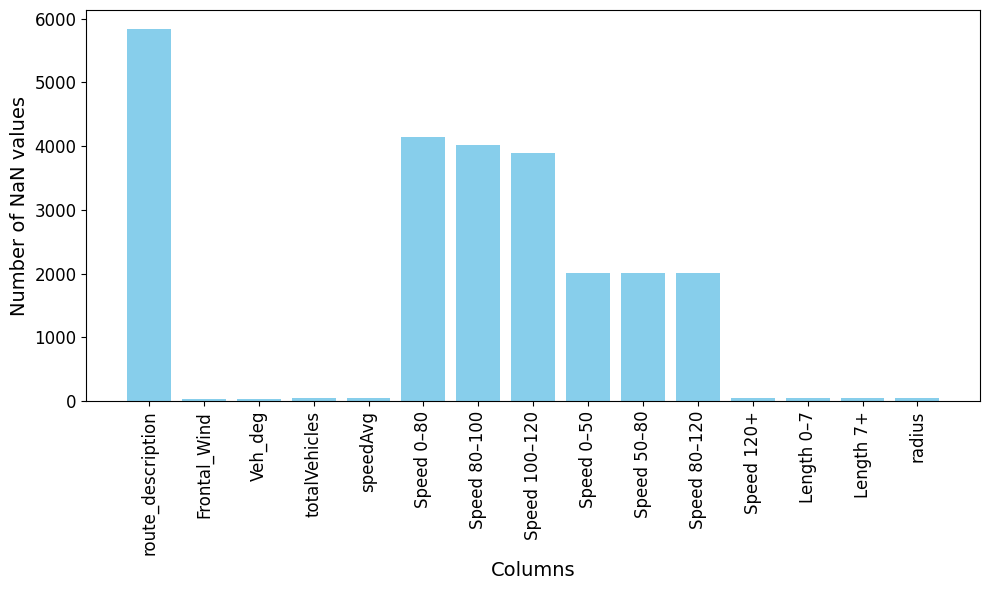

In [4]:
import os
import matplotlib.pyplot as plt
import pickle

# --- Create target directory ---
unnamed_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_folder, exist_ok=True)

# --- Compute NaN counts, excluding columns with 0 NaN values ---
nan_count = df.isna().sum()
nan_count = nan_count[nan_count > 0]

# --- Custom shorter names for specific long column names ---
rename_map = {
    "cars_by_speed_interval_0_80": "Speed 0–80",
    "cars_by_speed_interval_80_100": "Speed 80–100",
    "cars_by_speed_interval_100_120": "Speed 100–120",
    "cars_by_speed_interval_0_50": "Speed 0–50",
    "cars_by_speed_interval_50_80": "Speed 50–80",
    "cars_by_speed_interval_80_120": "Speed 80–120",
    "cars_by_speed_interval_120_inf": "Speed 120+",
    "cars_by_length_interval_0_7": "Length 0–7",
    "cars_by_length_interval_7_inf": "Length 7+"
}

# --- Apply rename map to column labels ---
nan_count_renamed = nan_count.rename(index=lambda x: rename_map.get(x, x))

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(nan_count_renamed.index, nan_count_renamed.values, color='skyblue')
ax.set_xlabel("Columns", fontsize=14)
ax.set_ylabel("Number of NaN values", fontsize=14)
ax.tick_params(axis='x', labelrotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()

# --- Save the figure ---
fig_path_fig = os.path.join(unnamed_folder, "nan_values_filtered.fig")
with open(fig_path_fig, "wb") as f:
    pickle.dump(fig, f)

fig_path_svg = os.path.join(unnamed_folder, "nan_values_filtered.svg")
fig.savefig(fig_path_svg, format="svg")

print(f"✅ Figure saved at: {fig_path_fig}")
print(f"✅ SVG saved at: {fig_path_svg}")


In [5]:
#drop unessary cols

cols_to_drop = [
    'cars_by_speed_interval_0_80',
    'cars_by_speed_interval_80_100',
    'cars_by_speed_interval_100_120',
    'cars_by_speed_interval_0_50',
    'cars_by_speed_interval_50_80',
    'cars_by_speed_interval_80_120',
    'cars_by_speed_interval_120_inf',
    'cars_by_length_interval_0_7',
    'cars_by_length_interval_7_inf',
    
]


df.drop(columns=cols_to_drop, inplace=True)

df.to_csv("combined_nissan_leaf_updated.csv", index=False)

print("Specified columns dropped successfully!")


Specified columns dropped successfully!


In [6]:
#drop unessary cols

cols_to_drop = [
    'route_description'
]


df.drop(columns=cols_to_drop, inplace=True)


print("Specified columns dropped successfully!")


Specified columns dropped successfully!


In [7]:
df.head()

timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  ...  wind_mph  wind_kph  \
0          1520              2          90  ...       2.2       3.6   
1          6200              2          89  ...       2.2       3.6   
2          9480              2          89  ...       2.2       3.6   
3          1960              2          89  ...       6.9      11.2   
4             0              2          88  ...       6.9      11.2   

   wind_degree  wind_dir  Frontal_Wind     Veh_deg totalVehicles  speedAvg  \
0            7         N     -0.471608  165.472486         389.0     115.0   
1            7         N     -3.372018   62.499915         389.0     115.0   
2            7         N     -3.376305  103.304374         389.0     115.0   
3          330       NNW     -2.874722 -164.872658         389.0     115.0   
4          330       NNW     -2.789435 -164.421701         389.0     115.0   

   max_speed radius  
0         30    3.0  
1         30    3.0  
2         55    3.0  
3         25    3.0  
4         90    3.0  

[5 rows x 39 columns]

In [8]:
# Assuming you've already loaded your DataFrame
import pandas as pd

# List of columns to drop
cols_to_drop = [
    "wind_mph",
    "wind_kph",
    "wind_degree",
    "wind_dir",
    "Veh_deg",
    "totalVehicles",
    "speedAvg",
    "max_speed",
    "radius",
    "timestamp_weather_utc",
    "car_description",
    "car_code",
    "route_description",
    "point_geom",
    "latitude",
    "longitude",
    "route_id",
    "timestamp_gps_utc",
    "time_diff",
    "car_id"
]

# Drop the specified columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Verify that the columns have been dropped
print("Remaining columns in the DataFrame:")
print(df.columns)


Remaining columns in the DataFrame:
Index(['timestamp_data_utc', 'elv_spy', 'speed', 'soc', 'amb_temp', 'soh',
       'regenwh', 'Motor Pwr(w)', 'Aux Pwr(100w)', 'Motor Temp', 'Torque Nm',
       'rpm', 'altitude', 'route_code', 'driver', 'start_timestamp',
       'end_timestamp', 'capacity', 'ref_consumption', 'Frontal_Wind'],
      dtype='object')


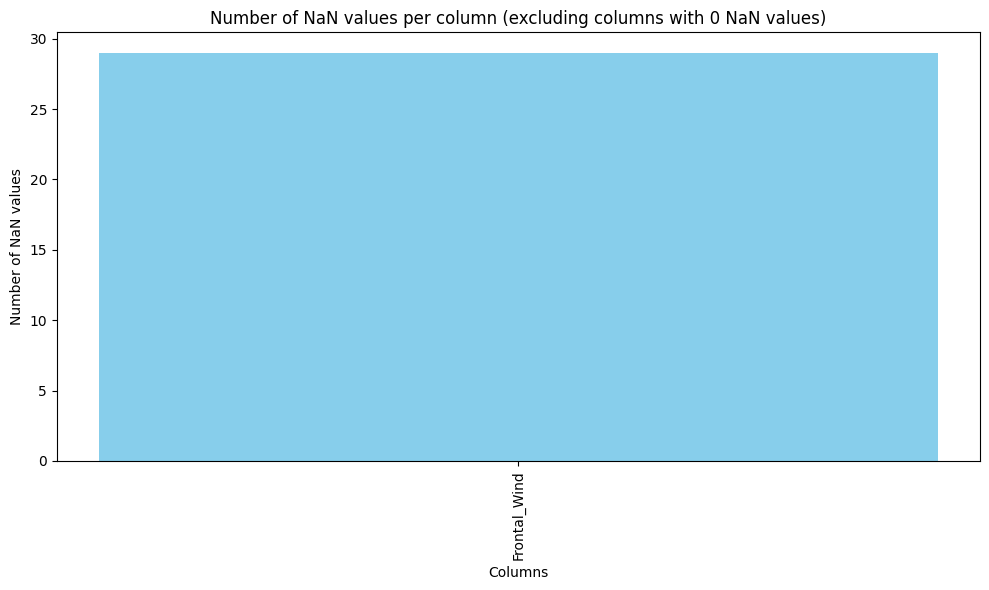

In [9]:
nan_count = df.isna().sum()

nan_count = nan_count[nan_count > 0]


plt.figure(figsize=(10, 6))
plt.bar(nan_count.index, nan_count.values, color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Number of NaN values per column (excluding columns with 0 NaN values)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

group_keys = ['soc', 'route_code', 'driver']

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col] = df.groupby(group_keys)[col].transform(lambda x: x.fillna(x.mean()))

print(df[numeric_cols].isna().sum())


elv_spy            0
speed              0
soc                0
amb_temp           0
soh                0
regenwh            0
Motor Pwr(w)       0
Aux Pwr(100w)      0
Motor Temp         0
Torque Nm          0
rpm                0
altitude           0
capacity           0
ref_consumption    0
Frontal_Wind       0
dtype: int64


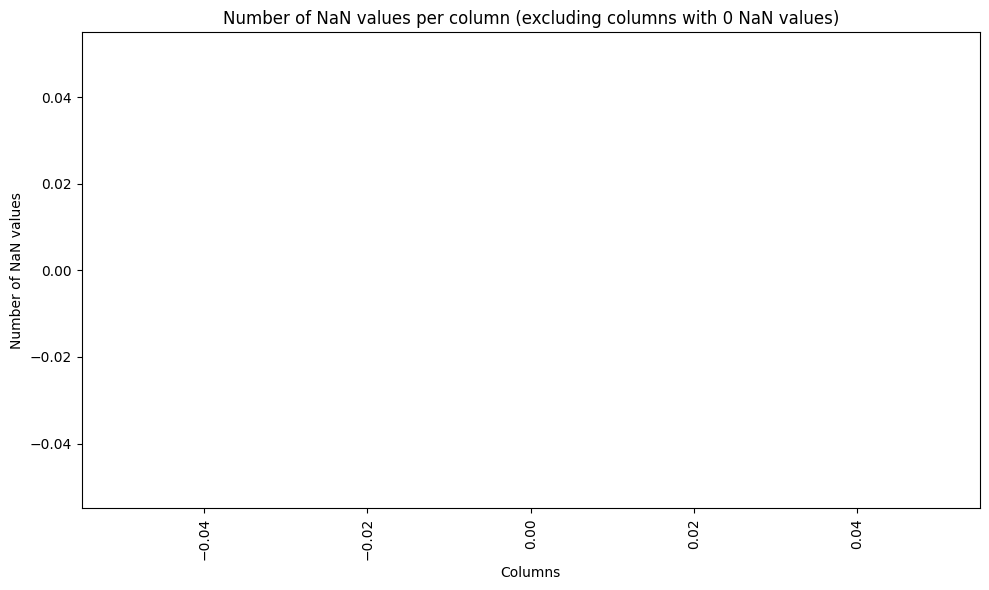

In [11]:
nan_count = df.isna().sum()

nan_count = nan_count[nan_count > 0]


plt.figure(figsize=(10, 6))
plt.bar(nan_count.index, nan_count.values, color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Number of NaN values per column (excluding columns with 0 NaN values)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## removed all NAN values

now grouping data to feed to baseline models

In [12]:
import pandas as pd

group_keys = ['soc', 'route_code', 'driver']

agg_dict = {}
for col in df.columns:
    if col in group_keys:
        continue
    elif col == 'start_timestamp':
        agg_dict[col] = 'min'
    elif col == 'end_timestamp':
        agg_dict[col] = 'max'
    elif pd.api.types.is_numeric_dtype(df[col]):
        agg_dict[col] = 'mean'
    else:
        agg_dict[col] = 'first'

grouped = df.groupby(group_keys).agg(agg_dict)
grouped['value_counts'] = df.groupby(group_keys).size()
grouped_df = grouped.reset_index()

grouped_df['total_time'] = grouped_df['value_counts'] * (60 / 7)
grouped_df['distance'] = grouped_df['speed'] * (grouped_df['total_time'] / 3600)

grouped_df.to_csv("grouped_data.csv", index=False)
print("Grouped data with total time and distance saved to grouped_data.csv")


Grouped data with total time and distance saved to grouped_data.csv


In [13]:
grouped_df.drop(columns=['value_counts'], inplace=True)


simplyfing all route code

In [ ]:
# Overwrite 'route_code' with simplified "[from] to [to]" format
def simplify_route(route_code):
    parts = route_code.split('_')
    if len(parts) >= 4:
        from_loc = parts[2]
        to_loc = parts[3]
        return f"{from_loc} to {to_loc}"
    return route_code 
grouped_df['route_code'] = grouped_df['route_code'].apply(simplify_route)
print(grouped_df['route_code'].unique())


['DONOSTIA to IRUN' 'TOLOSA to DONOSTIA' 'ZARAUTZ to DONOSTIA'
 'HERNANI to EIBAR' 'DONOSTIA to TOLOSA' 'EIBAR to DONOSTIA'
 'TOLOSA to ZARAUTZ' 'AZPEITIA to DONOSTIA' 'ANDOAIN to AZPEITIA'
 'DONOSTIA to HERNANI' 'HERNANI to TOLOSA' 'EIBAR to BILBAO'
 'ULIA to HERNANI' 'IRUN to ANDOAIN' 'BILBAO to EIBAR' 'DONOSTIA to ULIA']


In [16]:
grouped_df.head()

soc          route_code driver timestamp_data_utc     elv_spy      speed  \
0   58    DONOSTIA to IRUN     d1   18/04/2023 10:06  118.100000  18.800000   
1   59    DONOSTIA to IRUN     d1   18/04/2023 10:02   76.363636  58.618182   
2   59  TOLOSA to DONOSTIA     d4   19/04/2023 15:01  177.250000  39.130000   
3   60    DONOSTIA to IRUN     d1   18/04/2023 09:51   63.422222  43.011111   
4   60  TOLOSA to DONOSTIA     d4   19/04/2023 14:59  121.117647  51.035294   

    amb_temp    soh      regenwh  Motor Pwr(w)  ...  Torque Nm          rpm  \
0  17.000000  99.27 -4223.400000   2484.000000  ...   2.065000  1189.500000   
1  16.568182  99.27 -4166.772727   7581.818182  ...   2.152273  3995.000000   
2  24.500000  99.26  -708.050000   4294.000000  ...  -0.516500  2639.400000   
3  16.222222  99.27 -3968.822222   5102.222222  ...   0.961111  2942.022222   
4  24.852941  99.26  -591.176471   8082.352941  ...   2.757059  3436.941176   

     altitude  start_timestamp  end_timestamp capacity ref_consumption  \
0  118.720230          30:26.9        08:11.1  62000.0           174.0   
1   76.828297          30:26.9        08:11.1  62000.0           174.0   
2  177.600061          40:03.3        04:20.4  62000.0           174.0   
3   63.978131          30:26.9        08:11.1  62000.0           174.0   
4  121.024188          40:03.3        04:20.4  62000.0           174.0   

   Frontal_Wind  total_time  distance  
0      2.845855   85.714286  0.447619  
1      2.722711  188.571429  3.070476  
2     -7.175314  171.428571  1.863333  
3     -0.458555  385.714286  4.608333  
4     -5.409956  145.714286  2.065714  

[5 rows x 22 columns]

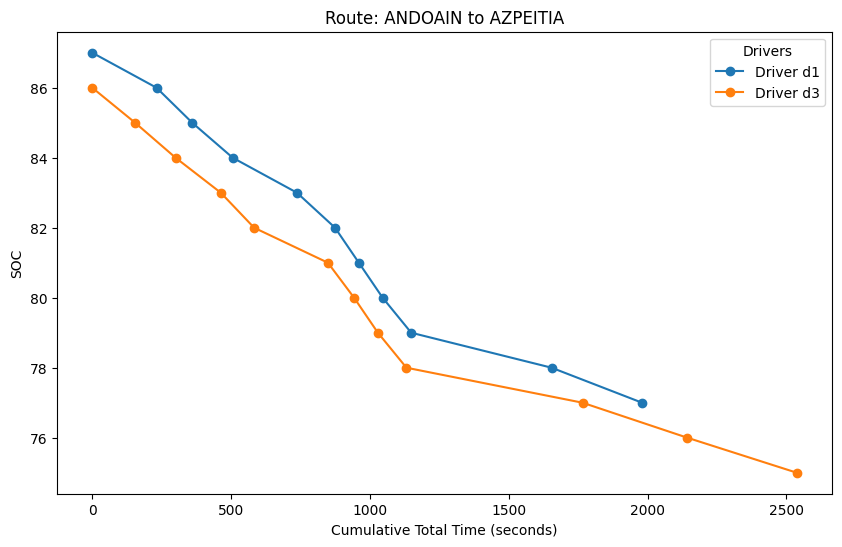

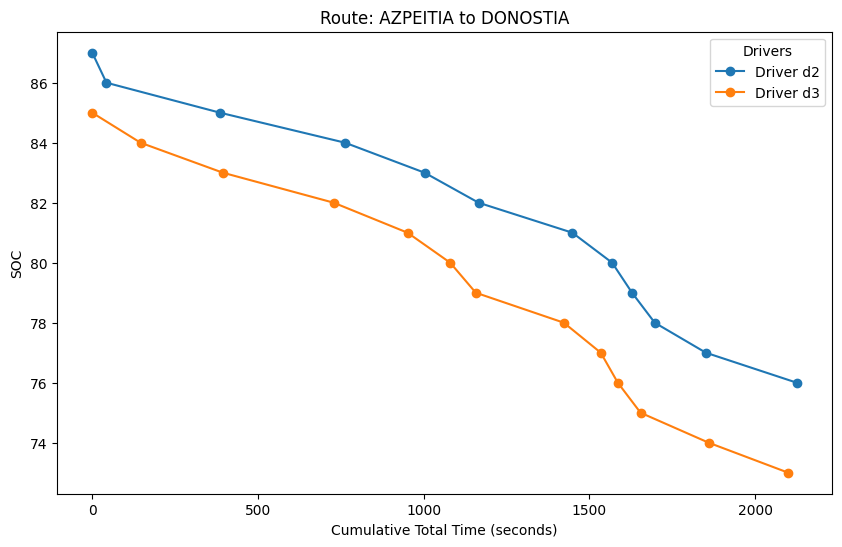

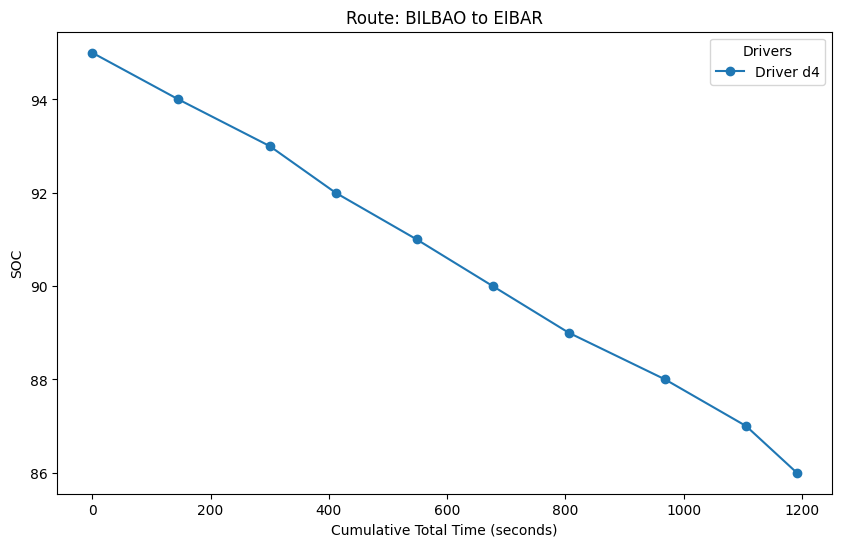

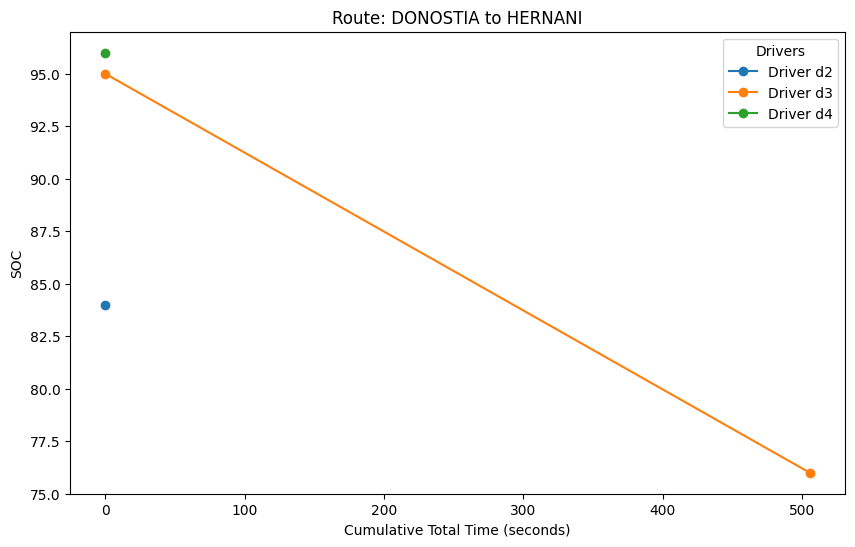

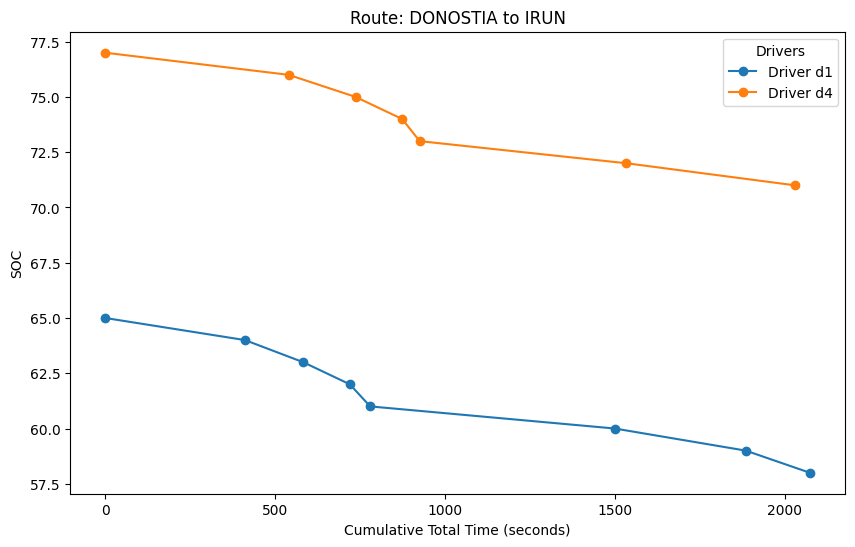

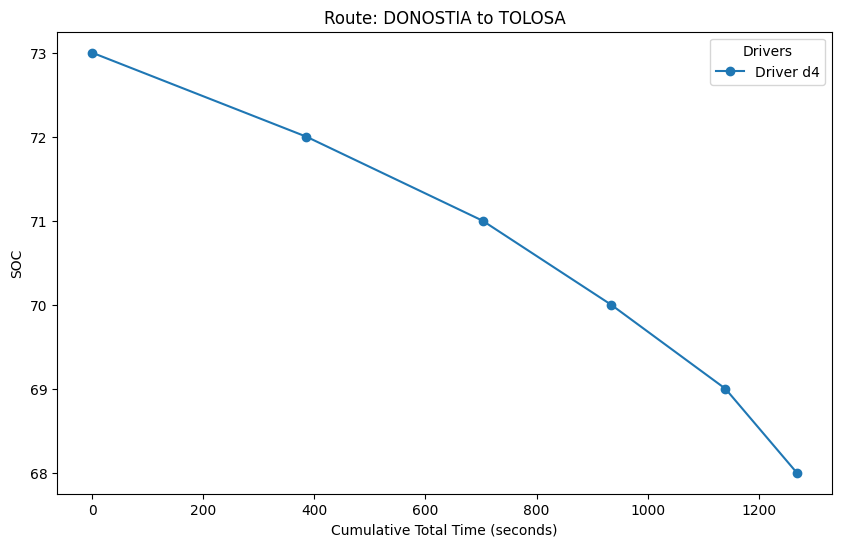

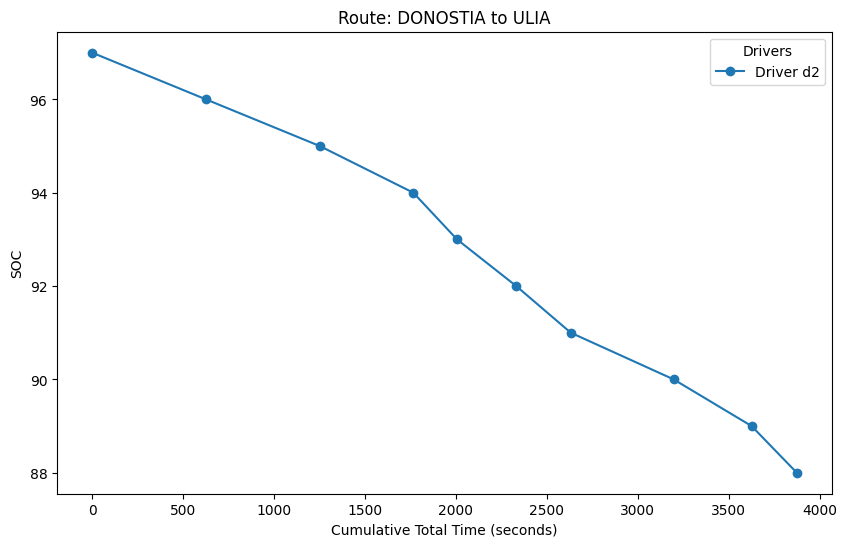

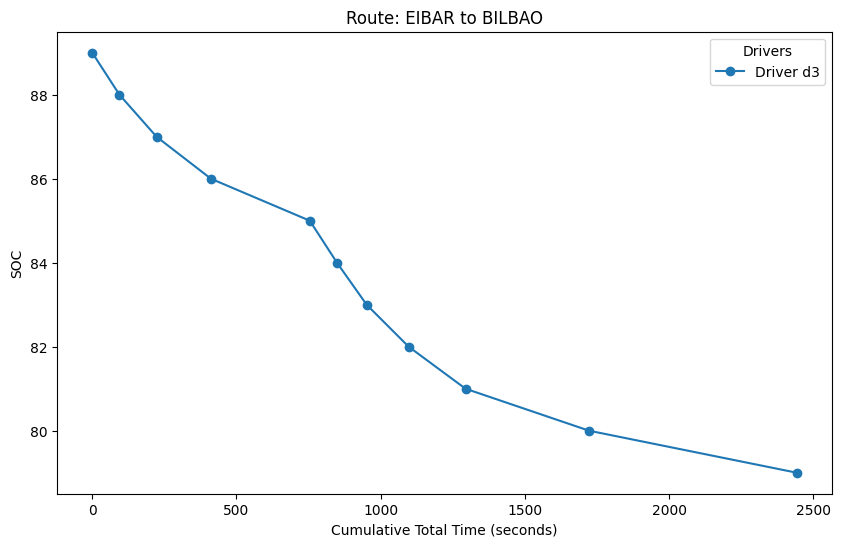

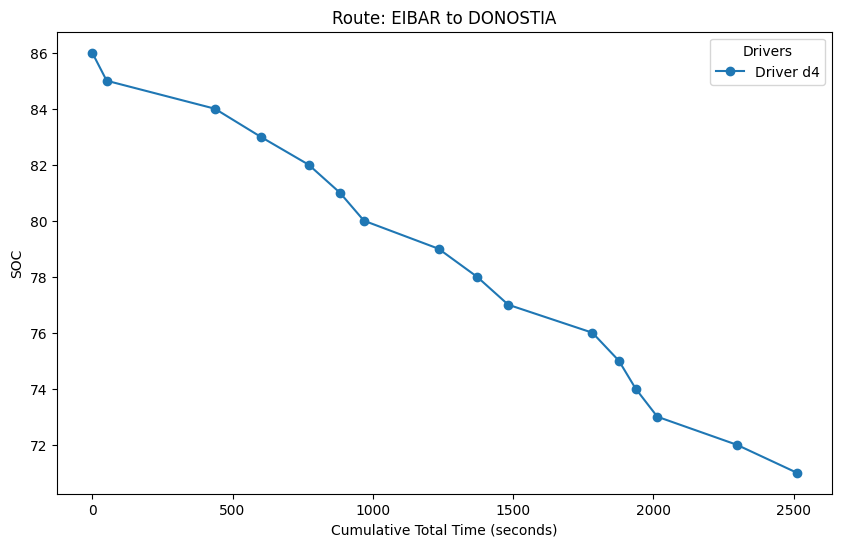

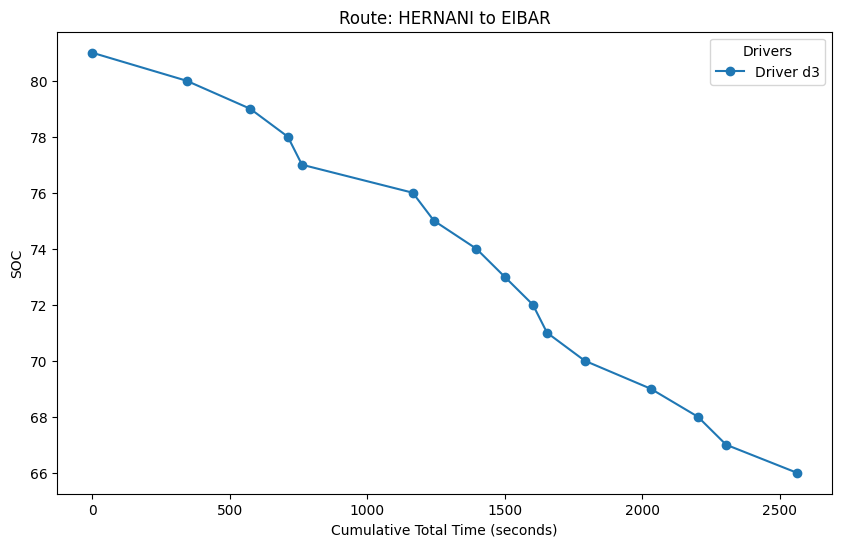

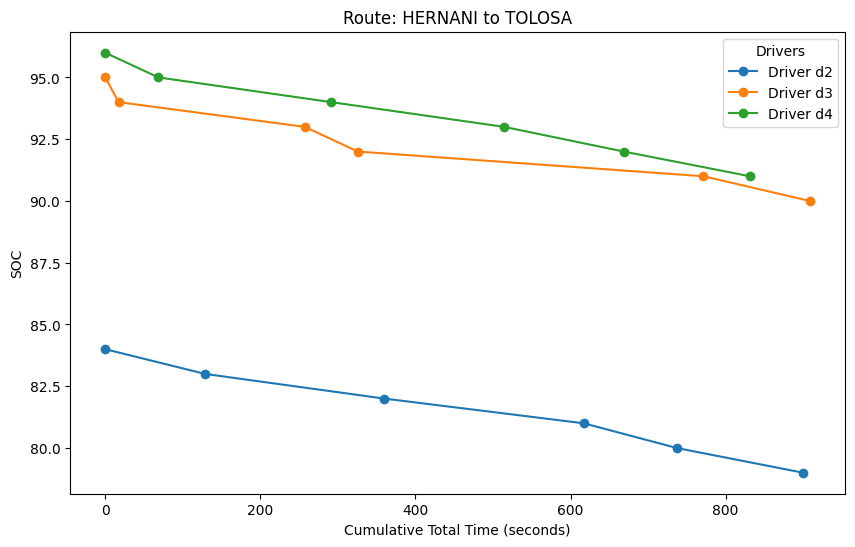

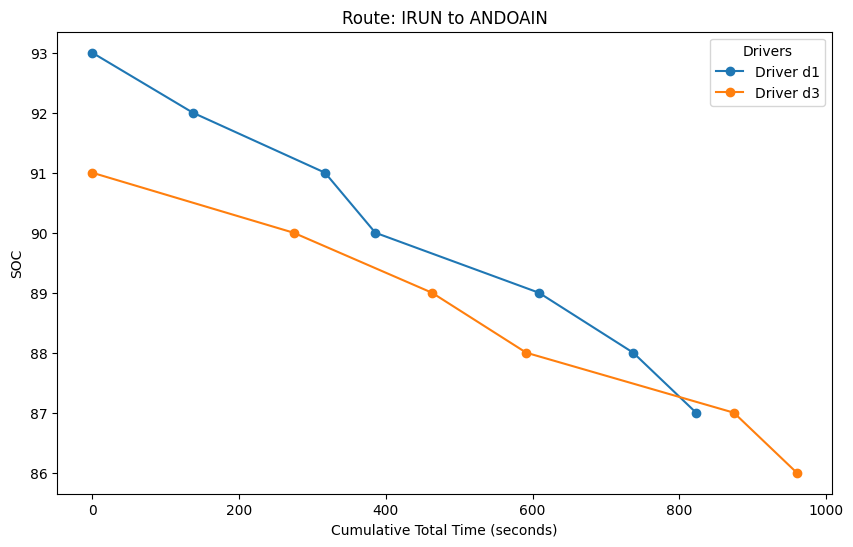

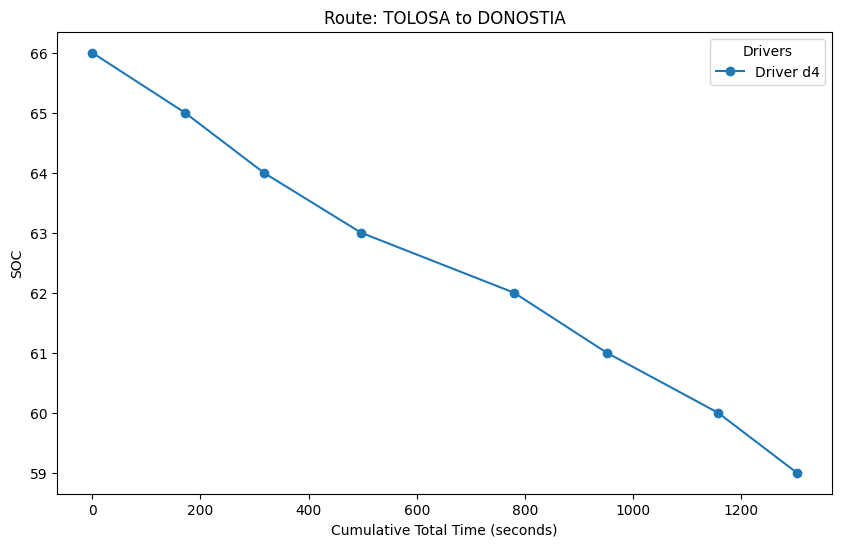

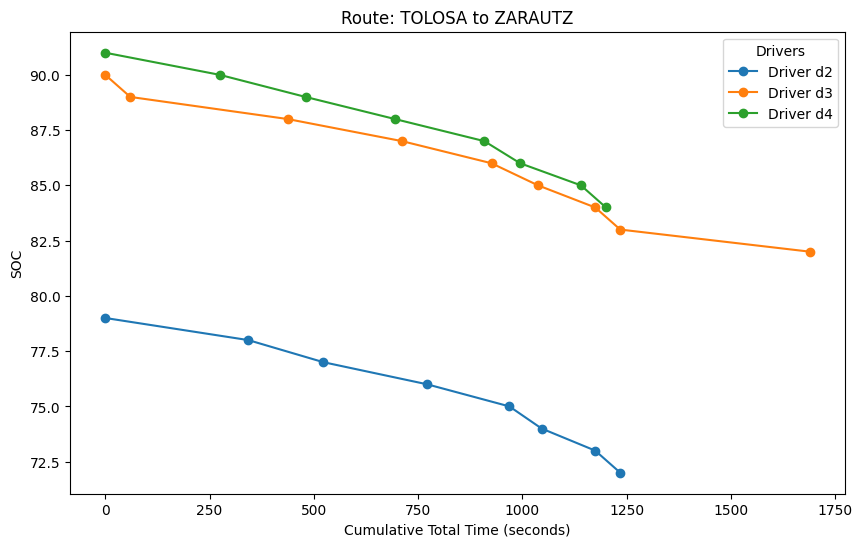

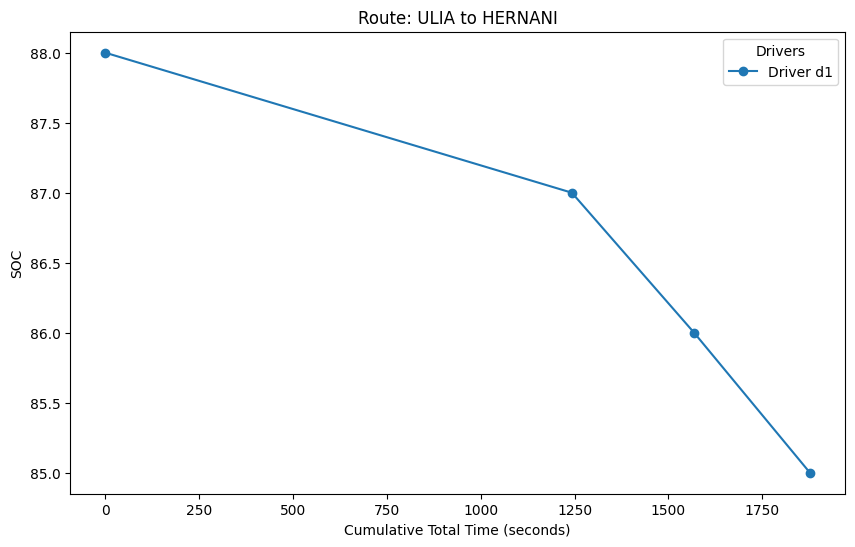

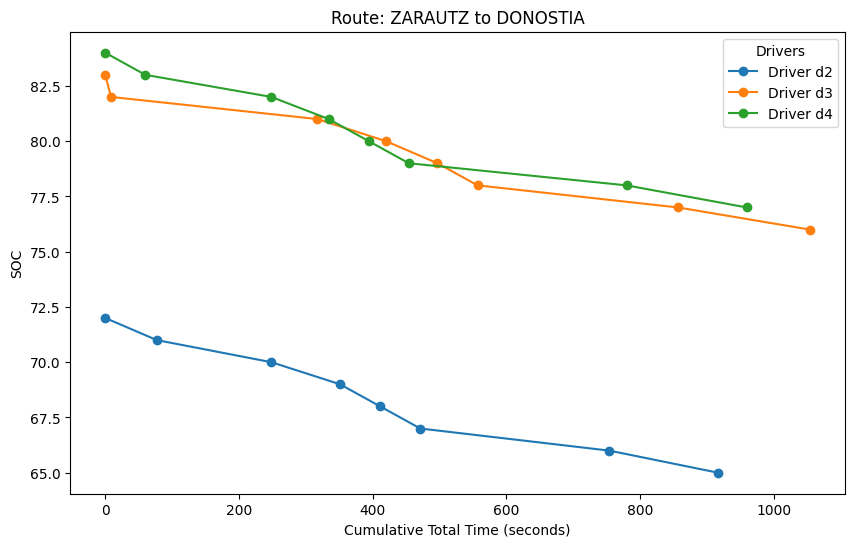

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each unique route_code
for route_code, route_group in grouped_df.groupby('route_code'):
    plt.figure(figsize=(10, 6))

    # Iterate over each driver in the route
    for driver, driver_group in route_group.groupby('driver'):
        driver_group = driver_group.sort_values('soc', ascending=False).copy()
        driver_group['cum_total_time'] = driver_group['total_time'].shift(fill_value=0).cumsum()

        # Plot each driver's data with a label
        plt.plot(driver_group['cum_total_time'], driver_group['soc'], marker='o', linestyle='-', label=f'Driver {driver}')

    plt.xlabel('Cumulative Total Time (seconds)')
    plt.ylabel('SOC')
    plt.title(f'Route: {route_code}')
    plt.legend(title="Drivers")
    plt.show()

#2 lines in the same graph will do not represnt the same route 

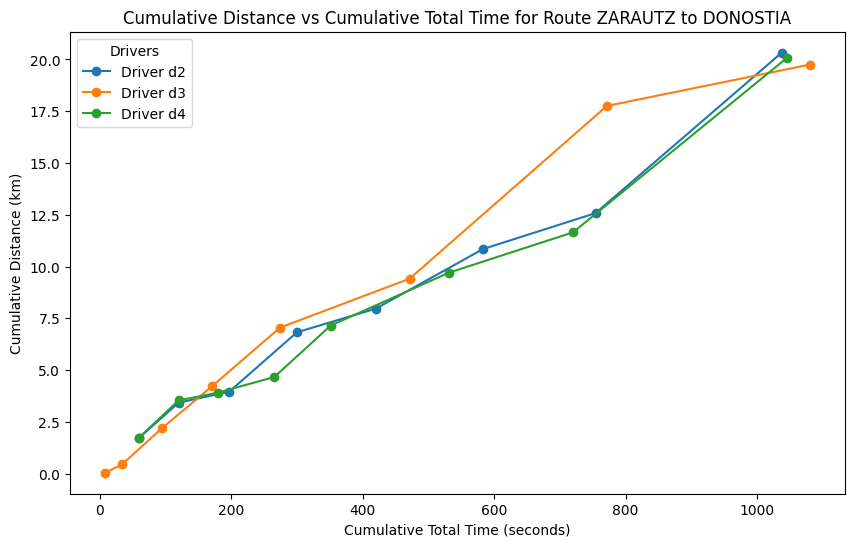

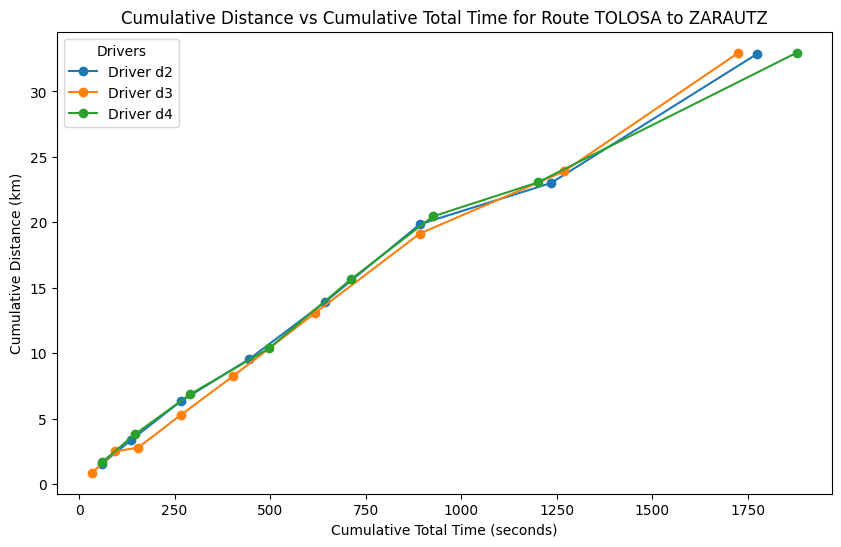

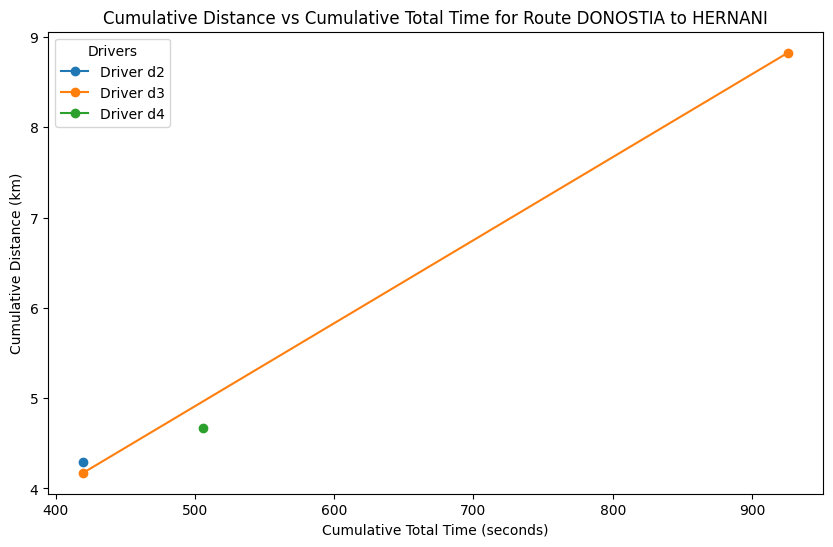

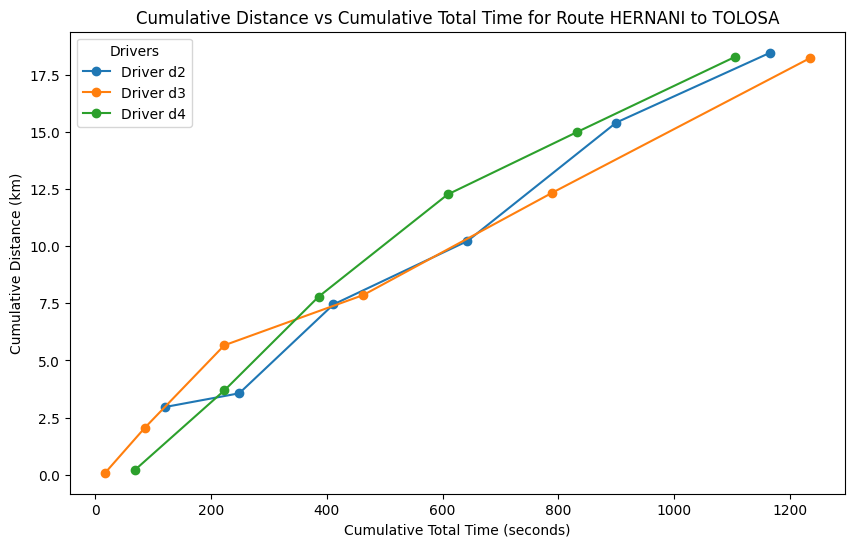

In [18]:
import matplotlib.pyplot as plt

# Define the drivers of interest
drivers = ['d2', 'd3', 'd4']

# Get the unique route codes where any of these drivers have data
route_codes = grouped_df[grouped_df['driver'].isin(drivers)]['route_code'].unique()

for route_code in route_codes:
    driver_dfs = {}
    
    # Process each driver's data for this route
    for driver in drivers:
        df_driver = grouped_df[
            (grouped_df['driver'] == driver) & 
            (grouped_df['route_code'] == route_code)
        ].copy()
        
        # Skip if no data for the driver on this route
        if df_driver.empty:
            continue

        # Sort by total_time and compute cumulative metrics
        df_driver = df_driver.sort_values('total_time')
        df_driver['cum_total_time'] = df_driver['total_time'].cumsum()
        df_driver['cum_distance'] = df_driver['distance'].cumsum()
        
        driver_dfs[driver] = df_driver

    # Only proceed if data exists for all three drivers
    if len(driver_dfs) != len(drivers):
        continue

    # Get the final cumulative distance for each driver
    final_cum_distances = {driver: df['cum_distance'].iloc[-1] for driver, df in driver_dfs.items()}

    # Check if the difference between the maximum and minimum final cumulative distances is <= 5 km
    if max(final_cum_distances.values()) - min(final_cum_distances.values()) <= 5:
        plt.figure(figsize=(10, 6))
        for driver, df in driver_dfs.items():
            plt.plot(df['cum_total_time'], df['cum_distance'], marker='o', linestyle='-', label=f'Driver {driver}')
        
        plt.xlabel('Cumulative Total Time (seconds)')
        plt.ylabel('Cumulative Distance (km)')
        plt.title(f'Cumulative Distance vs Cumulative Total Time for Route {route_code}')
        plt.legend(title="Drivers")
        plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\soc_vs_cum_total_time.png
EPS saved at: images\eps\soc_vs_cum_total_time.eps


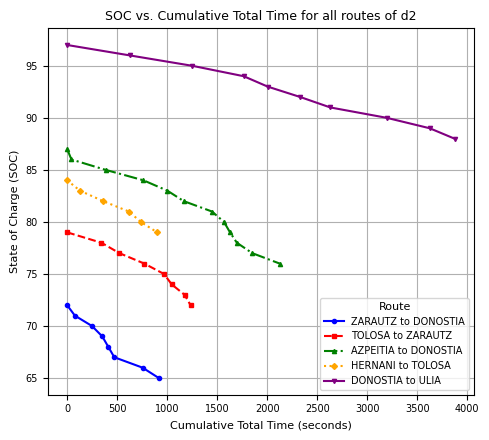

In [19]:
import os
import matplotlib.pyplot as plt
from itertools import cycle

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd2'].copy()

# Get the unique routes for driver d2
route_codes = d2_df['route_code'].unique()

# Define cycles for markers, line styles, and colors
markers = cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'])
line_styles = cycle(['-', '--', '-.', ':'])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

# Create a figure (5 inches wide by 4.5 inches high)
fig, ax = plt.subplots(figsize=(5, 4.5))

# Loop through each route and plot SOC vs. cumulative total time if it has more than 2 points
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    if len(route_df) > 2:
        route_df = route_df.sort_values('soc', ascending=False)
        route_df['cum_total_time'] = route_df['total_time'].shift(fill_value=0).cumsum()

        marker = next(markers)
        ls = next(line_styles)
        color = next(colors)

        ax.plot(
            route_df['cum_total_time'],
            route_df['soc'],
            marker=marker,
            markersize=3,
            linestyle=ls,
            label=route,
            color=color
        )

# Axis labels and formatting
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=8)
ax.set_ylabel('State of Charge (SOC)', fontsize=8)
ax.set_title('SOC vs. Cumulative Total Time for all routes of d2', fontsize=9)
ax.tick_params(axis='both', labelsize=7)

# Legend formatting
ax.legend(title='Route', fontsize=7, title_fontsize=8)

ax.grid(True)
plt.tight_layout()

# Save PNG and EPS
png_path = os.path.join(png_folder, "soc_vs_cum_total_time.png")
eps_path = os.path.join(eps_folder, "soc_vs_cum_total_time.eps")
fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
fig.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


PNG saved at: images\unamed_png\soc_vs_cum_total_time.png


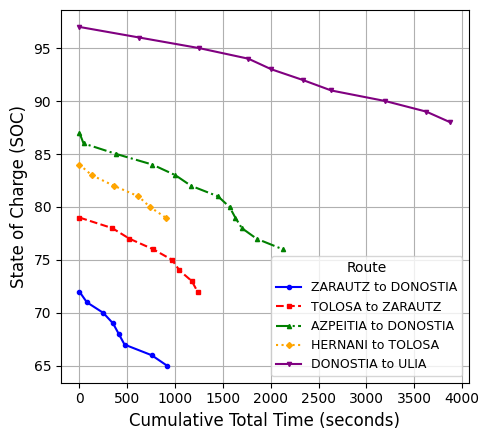

In [20]:
import os
import matplotlib.pyplot as plt
from itertools import cycle

# Create folder for unnamed PNGs
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd2'].copy()

# Get unique routes
route_codes = d2_df['route_code'].unique()

# Define styles
markers = cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'])
line_styles = cycle(['-', '--', '-.', ':'])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

# Create figure
fig, ax = plt.subplots(figsize=(5, 4.5))

# Plot each route
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    if len(route_df) > 2:
        route_df = route_df.sort_values('soc', ascending=False)
        route_df['cum_total_time'] = route_df['total_time'].shift(fill_value=0).cumsum()

        marker = next(markers)
        ls = next(line_styles)
        color = next(colors)

        ax.plot(
            route_df['cum_total_time'],
            route_df['soc'],
            marker=marker,
            markersize=3,
            linestyle=ls,
            label=route,
            color=color
        )

# Axis labels (with updated font size)
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=12)
ax.set_ylabel('State of Charge (SOC)', fontsize=12)

# Remove title
# ax.set_title(...)  ← Removed

# Tick label size
ax.tick_params(axis='both', labelsize=10)

# Legend formatting
ax.legend(title='Route', fontsize=9, title_fontsize=10)

ax.grid(True)
plt.tight_layout()

# Save only as PNG
png_path = os.path.join(unnamed_png_folder, "soc_vs_cum_total_time.png")
fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
print(f"PNG saved at: {png_path}")

plt.show()


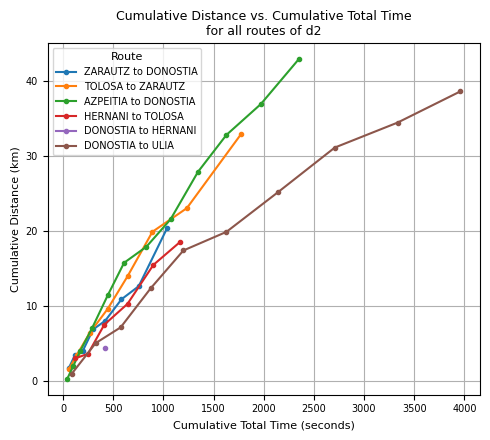

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd2'].copy()

# Get the unique routes for driver d2
route_codes = d2_df['route_code'].unique()

# Create a smaller figure (e.g., 5 inches wide by 4.5 inches high)
fig, ax = plt.subplots(figsize=(5, 4.5))

# Loop through each route and plot its cumulative metrics
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    # Sort by total_time to compute cumulative values correctly
    route_df = route_df.sort_values('total_time')
    route_df['cum_total_time'] = route_df['total_time'].cumsum()
    route_df['cum_distance'] = route_df['distance'].cumsum()
    
    # Plot the curve for the route with smaller markers
    ax.plot(
        route_df['cum_total_time'], 
        route_df['cum_distance'], 
        marker='o', 
        markersize=3,    # Adjust this value as needed
        linestyle='-', 
        label=route
    )

# Adjust axis labels, title, and tick label sizes for clarity in a smaller figure
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=8)
ax.set_ylabel('Cumulative Distance (km)', fontsize=8)
ax.set_title('Cumulative Distance vs. Cumulative Total Time\nfor all routes of d2', fontsize=9)
ax.tick_params(axis='both', labelsize=7)

# Adjust the legend font sizes
ax.legend(title='Route', fontsize=7, title_fontsize=8)

ax.grid(True)
plt.tight_layout()
plt.show()


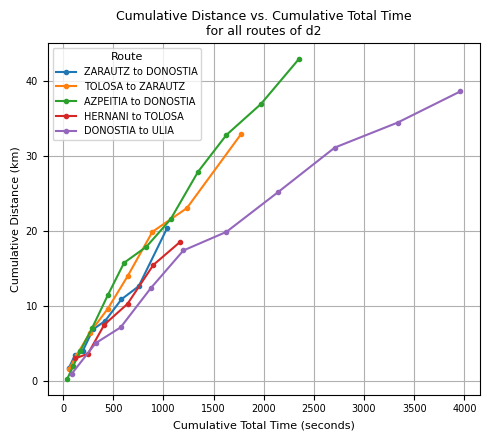

In [22]:
import matplotlib.pyplot as plt

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd2'].copy()

# Get the unique routes for driver d2
route_codes = d2_df['route_code'].unique()

# Create a figure (5 inches wide by 4.5 inches high)
fig, ax = plt.subplots(figsize=(5, 4.5))

# Loop through each route and plot its cumulative metrics if it has more than 2 points
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    # Only plot if there are more than 2 points in the route
    if len(route_df) > 2:
        # Sort by total_time to compute cumulative values correctly
        route_df = route_df.sort_values('total_time')
        route_df['cum_total_time'] = route_df['total_time'].cumsum()
        route_df['cum_distance'] = route_df['distance'].cumsum()
        
        # Plot the curve for the route with smaller markers
        ax.plot(
            route_df['cum_total_time'], 
            route_df['cum_distance'], 
            marker='o', 
            markersize=3,    # Adjust this value as needed
            linestyle='-', 
            label=route
        )

# Adjust axis labels, title, and tick label sizes for clarity in the figure
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=8)
ax.set_ylabel('Cumulative Distance (km)', fontsize=8)
ax.set_title('Cumulative Distance vs. Cumulative Total Time\nfor all routes of d2', fontsize=9)
ax.tick_params(axis='both', labelsize=7)

# Adjust the legend font sizes
ax.legend(title='Route', fontsize=7, title_fontsize=8)

ax.grid(True)
plt.tight_layout()
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\cumulative_distance_vs_time.png
EPS saved at: images\eps\cumulative_distance_vs_time.eps


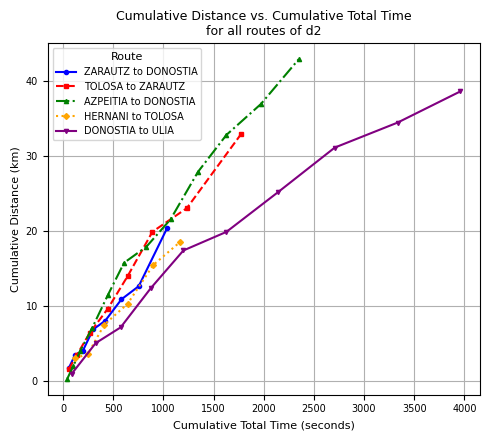

In [23]:
import os
import matplotlib.pyplot as plt
from itertools import cycle

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd2'].copy()

# Get the unique routes for driver d2
route_codes = d2_df['route_code'].unique()

# Define cycles for markers, line styles, and colors
markers = cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'])
line_styles = cycle(['-', '--', '-.', ':'])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

# Create a figure (5 inches wide by 4.5 inches high)
fig, ax = plt.subplots(figsize=(5, 4.5))

# Loop through each route and plot its cumulative metrics if it has more than 2 points
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    # Only plot if there are more than 2 points in the route
    if len(route_df) > 2:
        # Sort by total_time to compute cumulative values correctly
        route_df = route_df.sort_values('total_time')
        route_df['cum_total_time'] = route_df['total_time'].cumsum()
        route_df['cum_distance'] = route_df['distance'].cumsum()
        
        # Get the next marker, line style, and color from the cycles
        marker = next(markers)
        ls = next(line_styles)
        color = next(colors)
        
        # Plot using the specified color, marker, and line style
        ax.plot(
            route_df['cum_total_time'], 
            route_df['cum_distance'], 
            marker=marker, 
            markersize=3,  # Adjust as needed
            linestyle=ls, 
            label=route,
            color=color
        )

# Adjust axis labels, title, and tick label sizes
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=8)
ax.set_ylabel('Cumulative Distance (km)', fontsize=8)
ax.set_title('Cumulative Distance vs. Cumulative Total Time\nfor all routes of d2', fontsize=9)
ax.tick_params(axis='both', labelsize=7)

# Adjust the legend font sizes
ax.legend(title='Route', fontsize=7, title_fontsize=8)

ax.grid(True)
plt.tight_layout()

# Save the figure as a high-resolution PNG file in the png folder
png_path = os.path.join(png_folder, "cumulative_distance_vs_time.png")
fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save the figure as an EPS file in the eps folder
eps_path = os.path.join(eps_folder, "cumulative_distance_vs_time.eps")
fig.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Define directory and activation functions
data_dir = "data_forplots"
activation_names = ["relu", "tanh", "sigmoid", "selu"]

# Step 2: Load data
results = {}
for name in activation_names:
    file_path = os.path.join(data_dir, f"{name}_results.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        results[name] = (df['Actual'].values, df['Predicted'].values)
    else:
        print(f"Warning: File not found for activation '{name}'")

# Ensure the main folder and subfolders exist for saving
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Plot individual graphs for each activation function
saved_paths = []
for name, (y_true, y_pred) in results.items():
    fig, ax = plt.subplots(figsize=(5, 4.5))
    ax.plot(y_true[:100], label='Expected', color='blue')
    ax.plot(y_pred[:100], label='Predicted', color='orange')
    ax.set_title(f'Activation: {name}', fontsize=9)
    ax.set_xlabel('Sample Index', fontsize=8)
    ax.set_ylabel('Range', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.legend(fontsize=7)
    ax.grid(True)
    plt.tight_layout()
    
    # Save figures
    png_path = os.path.join(png_folder, f"{name}_expected_vs_predicted.png")
    eps_path = os.path.join(eps_folder, f"{name}_expected_vs_predicted.eps")
    fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
    fig.savefig(eps_path, format="eps", bbox_inches="tight")
    saved_paths.append((png_path, eps_path))
    plt.close(fig)

saved_paths


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[('images\\png\\relu_expected_vs_predicted.png',
  'images\\eps\\relu_expected_vs_predicted.eps'),
 ('images\\png\\tanh_expected_vs_predicted.png',
  'images\\eps\\tanh_expected_vs_predicted.eps'),
 ('images\\png\\sigmoid_expected_vs_predicted.png',
  'images\\eps\\sigmoid_expected_vs_predicted.eps'),
 ('images\\png\\selu_expected_vs_predicted.png',
  'images\\eps\\selu_expected_vs_predicted.eps')]

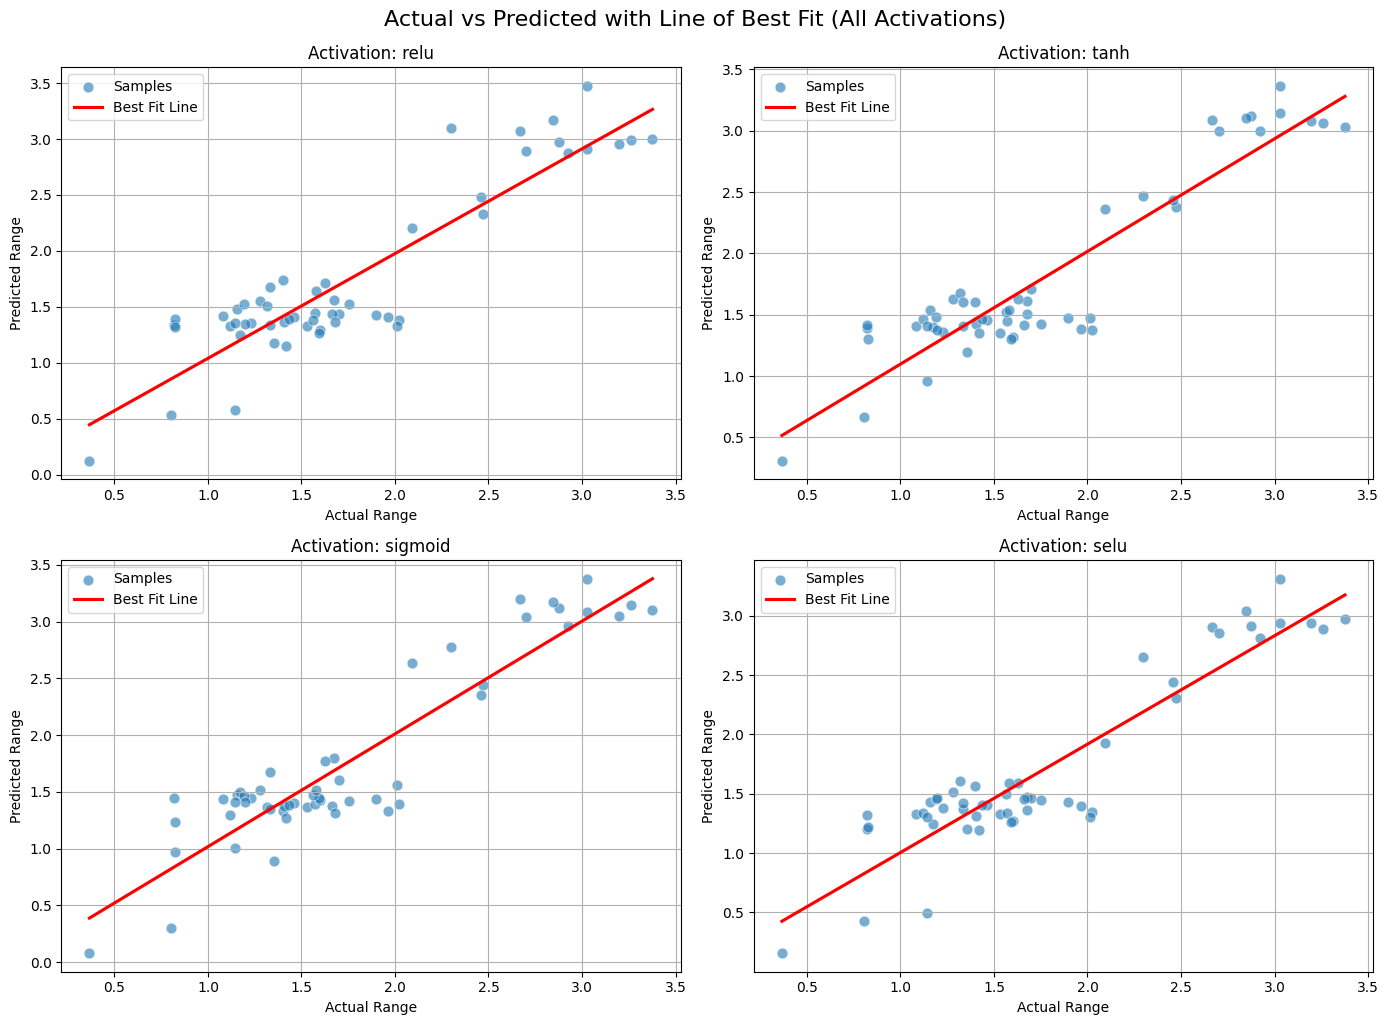

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Step 1: Define directory and activation functions
data_dir = "data_forplots"
activation_names = ["relu", "tanh", "sigmoid", "selu"]

# Step 2: Load data
results = {}
for name in activation_names:
    file_path = os.path.join(data_dir, f"{name}_results.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        results[name] = (df['Actual'].values, df['Predicted'].values)
    else:
        print(f"Warning: File not found for activation '{name}'")

# Step 3: Plot scatter with line of best fit
plt.figure(figsize=(14, 10))

for i, (name, (y_true, y_pred)) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    
    # Scatter plot with bigger dots
    sns.scatterplot(x=y_true, y=y_pred, s=60, alpha=0.6, label='Samples')  # <- Bigger dots
    
    # Line of best fit
    sns.regplot(x=y_true, y=y_pred, scatter=False, ci=None, color='red', label='Best Fit Line')
    
    # Plot settings
    plt.title(f'Activation: {name}')
    plt.xlabel('Actual Range')
    plt.ylabel('Predicted Range')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Actual vs Predicted with Line of Best Fit (All Activations)', fontsize=16, y=1.02)
plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Define directory and activation functions
data_dir = "data_forplots"
activation_names = ["relu", "tanh", "sigmoid", "selu"]

# Step 2: Load data
results = {}
for name in activation_names:
    file_path = os.path.join(data_dir, f"{name}_results.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        results[name] = (df['Actual'].values, df['Predicted'].values)
    else:
        print(f"Warning: File not found for activation '{name}'")

# Ensure the unamed_png folder exists
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Plot individual graphs for each activation function
saved_paths = []
for name, (y_true, y_pred) in results.items():
    fig, ax = plt.subplots(figsize=(5, 4.5))
    ax.plot(y_true[:100], label='Expected', color='blue')
    ax.plot(y_pred[:100], label='Predicted', color='orange')
    
    # Removed title and increased label font sizes
    ax.set_xlabel('Sample Index', fontsize=12)
    ax.set_ylabel('Range', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(fontsize=9)
    ax.grid(True)
    plt.tight_layout()
    
    # Save figure as PNG only in unamed_png
    png_path = os.path.join(unnamed_png_folder, f"{name}_expected_vs_predicted.png")
    fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
    saved_paths.append(png_path)
    plt.close(fig)

saved_paths


['images\\unamed_png\\relu_expected_vs_predicted.png',
 'images\\unamed_png\\tanh_expected_vs_predicted.png',
 'images\\unamed_png\\sigmoid_expected_vs_predicted.png',
 'images\\unamed_png\\selu_expected_vs_predicted.png']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\cumulative_distance_vs_time_d1.png
EPS saved at: images\eps\cumulative_distance_vs_time_d1.eps


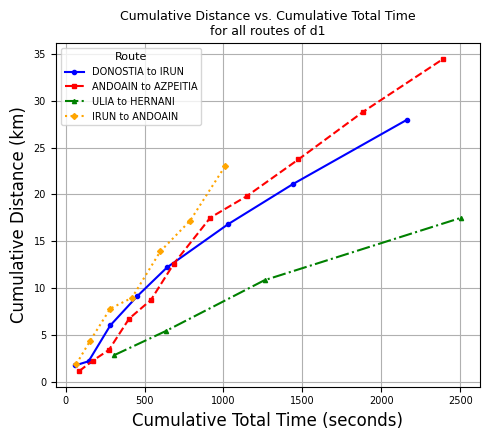

In [27]:
import os
import matplotlib.pyplot as plt
from itertools import cycle

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Filter the DataFrame for driver d2
d2_df = grouped_df[grouped_df['driver'] == 'd1'].copy()

# Get the unique routes for driver d2
route_codes = d2_df['route_code'].unique()

# Define cycles for markers, line styles, and colors
markers = cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'])
line_styles = cycle(['-', '--', '-.', ':'])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

# Create a figure (5 inches wide by 4.5 inches high)
fig, ax = plt.subplots(figsize=(5, 4.5))

# Loop through each route and plot its cumulative metrics if it has more than 2 points
for route in route_codes:
    route_df = d2_df[d2_df['route_code'] == route].copy()
    
    # Only plot if there are more than 2 points in the route
    if len(route_df) > 2:
        # Sort by total_time to compute cumulative values correctly
        route_df = route_df.sort_values('total_time')
        route_df['cum_total_time'] = route_df['total_time'].cumsum()
        route_df['cum_distance'] = route_df['distance'].cumsum()
        
        # Get the next marker, line style, and color from the cycles
        marker = next(markers)
        ls = next(line_styles)
        color = next(colors)
        
        # Plot using the specified color, marker, and line style
        ax.plot(
            route_df['cum_total_time'], 
            route_df['cum_distance'], 
            marker=marker, 
            markersize=3,  # Adjust as needed
            linestyle=ls, 
            label=route,
            color=color
        )

# Adjust axis labels, title, and tick label sizes
ax.set_xlabel('Cumulative Total Time (seconds)', fontsize=12)
ax.set_ylabel('Cumulative Distance (km)', fontsize=12)
ax.set_title('Cumulative Distance vs. Cumulative Total Time\nfor all routes of d1', fontsize=9)
ax.tick_params(axis='both', labelsize=7)

# Adjust the legend font sizes
ax.legend(title='Route', fontsize=7, title_fontsize=8)

ax.grid(True)
plt.tight_layout()

# Save the figure as a high-resolution PNG file in the png folder
png_path = os.path.join(png_folder, "cumulative_distance_vs_time_d1.png")
fig.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save the figure as an EPS file in the eps folder
eps_path = os.path.join(eps_folder, "cumulative_distance_vs_time_d1.eps")
fig.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


# pre processing and baseline model building

In [40]:
from sklearn.feature_selection import VarianceThreshold

numeric_df = grouped_df.select_dtypes(include=['number'])
categorical_df = grouped_df.select_dtypes(exclude=['number'])

vt = VarianceThreshold(threshold=0.1)
reduced_data = vt.fit_transform(numeric_df)
features_kept = numeric_df.columns[vt.get_support()]

numeric_reduced_df = pd.DataFrame(reduced_data, columns=features_kept, index=grouped_df.index)
grouped_df = pd.concat([numeric_reduced_df, categorical_df], axis=1)

print("Features kept after Variance Threshold:")
print(features_kept)



Features kept after Variance Threshold:
Index(['soc', 'elv_spy', 'speed', 'amb_temp', 'regenwh', 'Motor Pwr(w)',
       'Aux Pwr(100w)', 'Motor Temp', 'Torque Nm', 'rpm', 'altitude',
       'Frontal_Wind', 'total_time', 'distance'],
      dtype='object')


In [41]:
grouped_df.head()

soc     elv_spy      speed   amb_temp      regenwh  Motor Pwr(w)  \
0  58.0  118.100000  18.800000  17.000000 -4223.400000   2484.000000   
1  59.0   76.363636  58.618182  16.568182 -4166.772727   7581.818182   
2  59.0  177.250000  39.130000  24.500000  -708.050000   4294.000000   
3  60.0   63.422222  43.011111  16.222222 -3968.822222   5102.222222   
4  60.0  121.117647  51.035294  24.852941  -591.176471   8082.352941   

   Aux Pwr(100w)  Motor Temp  Torque Nm          rpm    altitude  \
0            2.0   87.300000   2.065000  1189.500000  118.720230   
1            2.0   86.909091   2.152273  3995.000000   76.828297   
2            3.0   97.450000  -0.516500  2639.400000  177.600061   
3            2.0   84.377778   0.961111  2942.022222   63.978131   
4            3.0   95.588235   2.757059  3436.941176  121.024188   

   Frontal_Wind  total_time  distance          route_code driver  \
0      2.845855   85.714286  0.447619    DONOSTIA to IRUN     d1   
1      2.722711  188.571429  3.070476    DONOSTIA to IRUN     d1   
2     -7.175314  171.428571  1.863333  TOLOSA to DONOSTIA     d4   
3     -0.458555  385.714286  4.608333    DONOSTIA to IRUN     d1   
4     -5.409956  145.714286  2.065714  TOLOSA to DONOSTIA     d4   

  timestamp_data_utc start_timestamp end_timestamp  
0   18/04/2023 10:06         30:26.9       08:11.1  
1   18/04/2023 10:02         30:26.9       08:11.1  
2   19/04/2023 15:01         40:03.3       04:20.4  
3   18/04/2023 09:51         30:26.9       08:11.1  
4   19/04/2023 14:59         40:03.3       04:20.4

PNG saved at: images\unamed_png\correlation_matrix.png


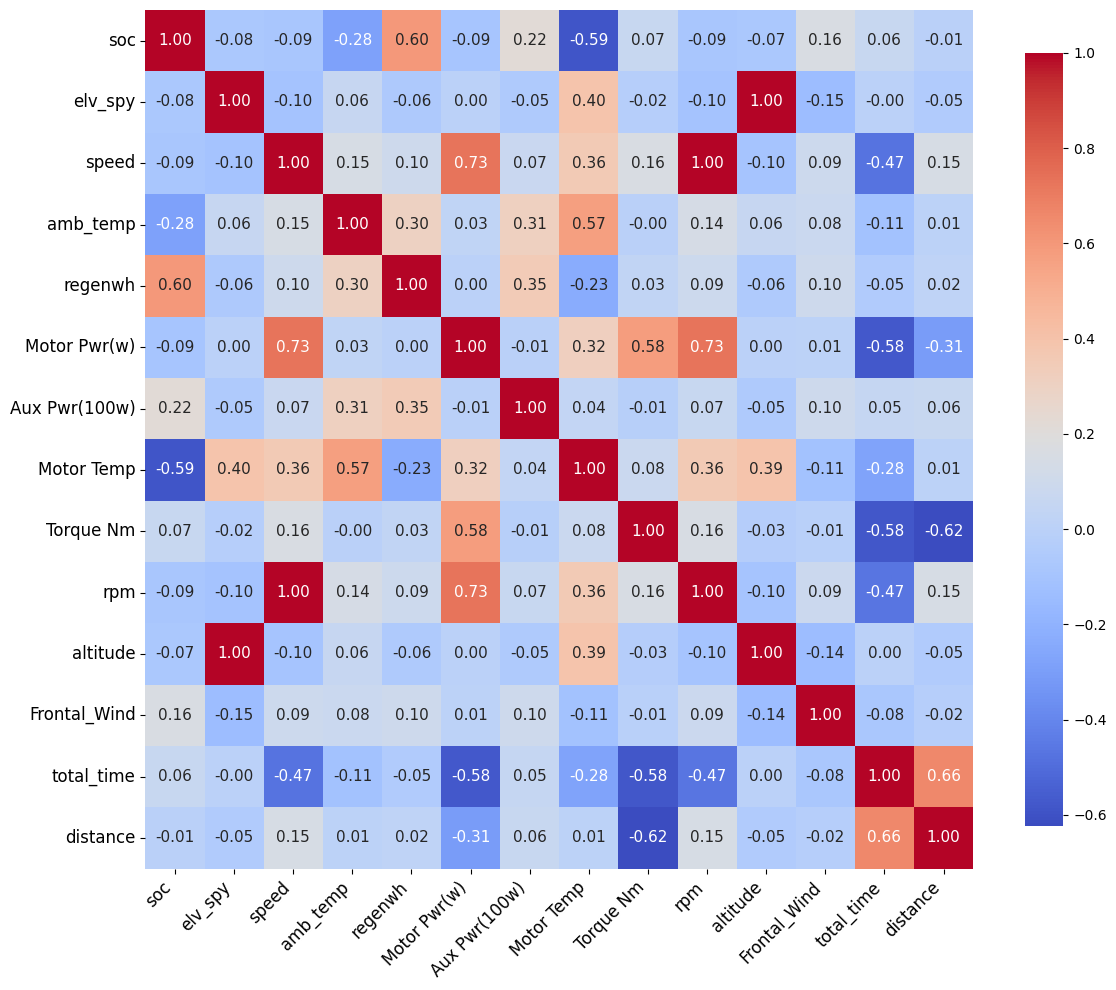

In [42]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the unnamed_png folder exists
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Calculate correlation matrix from numeric columns
numeric_df = grouped_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Remove rows and columns where all values are NaN or zero
corr_matrix = corr_matrix.dropna(how='all').dropna(axis=1, how='all')
corr_matrix = corr_matrix.loc[:, (corr_matrix != 0).any(axis=0)]
corr_matrix = corr_matrix[(corr_matrix != 0).any(axis=1)]

# Create the heatmap with a figure size of 12 x 10 inches
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.9}
)

# Increase font size for axis tick labels (column names)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.tight_layout()

# Save as PNG in unnamed folder
png_path = os.path.join(unnamed_png_folder, "correlation_matrix.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

print(f"PNG saved at: {png_path}")

plt.show()


PNG saved at: images\png\correlation_matrix.png
EPS saved at: images\eps\correlation_matrix.eps


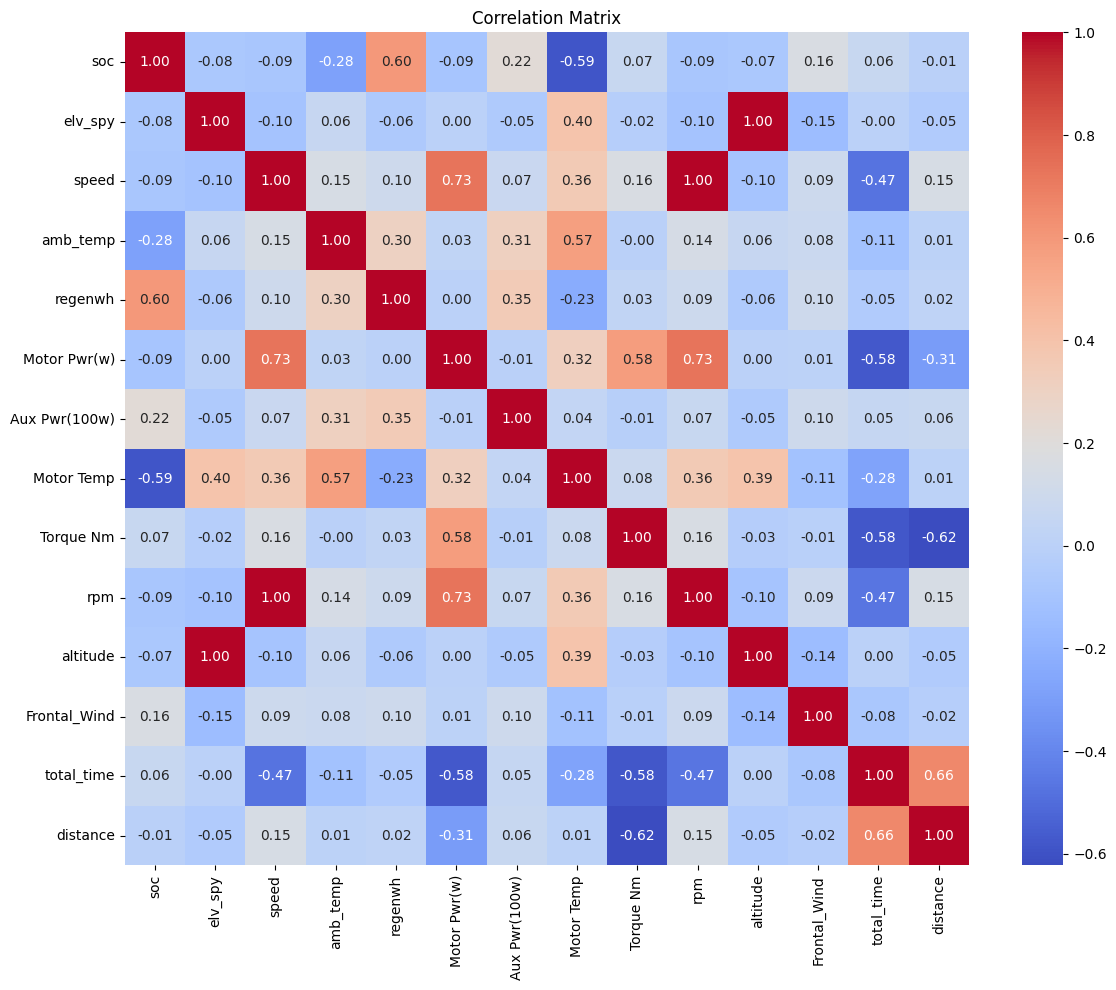

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatter PNG saved at: images\png\scatter_distance_vs_total_time.png
Scatter EPS saved at: images\eps\scatter_distance_vs_total_time.eps


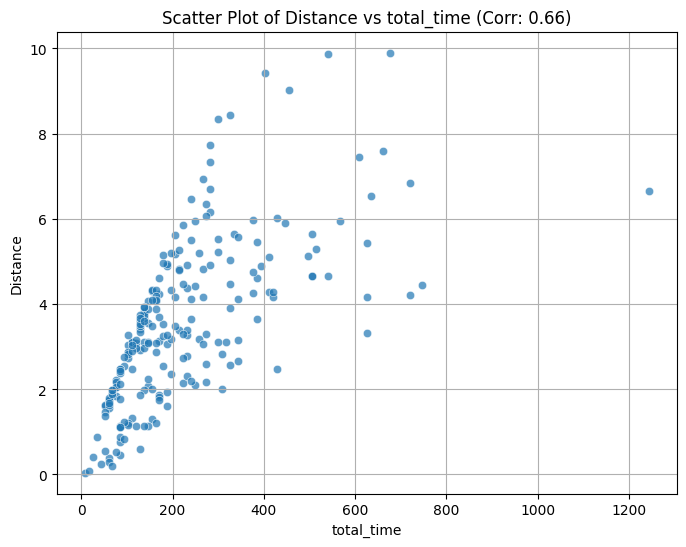

In [43]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Calculate correlation matrix from numeric columns
numeric_df = grouped_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Find the column with the highest absolute correlation with 'distance'
corr_with_distance = corr_matrix["distance"].drop("distance")  # Remove self-correlation
highest_corr_feature = corr_with_distance.abs().idxmax()
highest_corr_value = corr_with_distance[highest_corr_feature]

# Create and save heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()

# Save correlation matrix as PNG & EPS
png_path = os.path.join(png_folder, "correlation_matrix.png")
eps_path = os.path.join(eps_folder, "correlation_matrix.eps")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()

# --- Scatter Plot for Highest Correlated Feature ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=grouped_df[highest_corr_feature], y=grouped_df["distance"], alpha=0.7)
plt.xlabel(highest_corr_feature)
plt.ylabel("Distance")
plt.title(f"Scatter Plot of Distance vs {highest_corr_feature} (Corr: {highest_corr_value:.2f})")
plt.grid(True)

# Save scatter plot
scatter_png_path = os.path.join(png_folder, f"scatter_distance_vs_{highest_corr_feature}.png")
scatter_eps_path = os.path.join(eps_folder, f"scatter_distance_vs_{highest_corr_feature}.eps")
plt.savefig(scatter_png_path, format="png", dpi=300, bbox_inches="tight")
plt.savefig(scatter_eps_path, format="eps", bbox_inches="tight")

print(f"Scatter PNG saved at: {scatter_png_path}")
print(f"Scatter EPS saved at: {scatter_eps_path}")

plt.show()


PNG saved at: images\png\correlation_matrix.png
EPS saved at: images\eps\correlation_matrix.eps


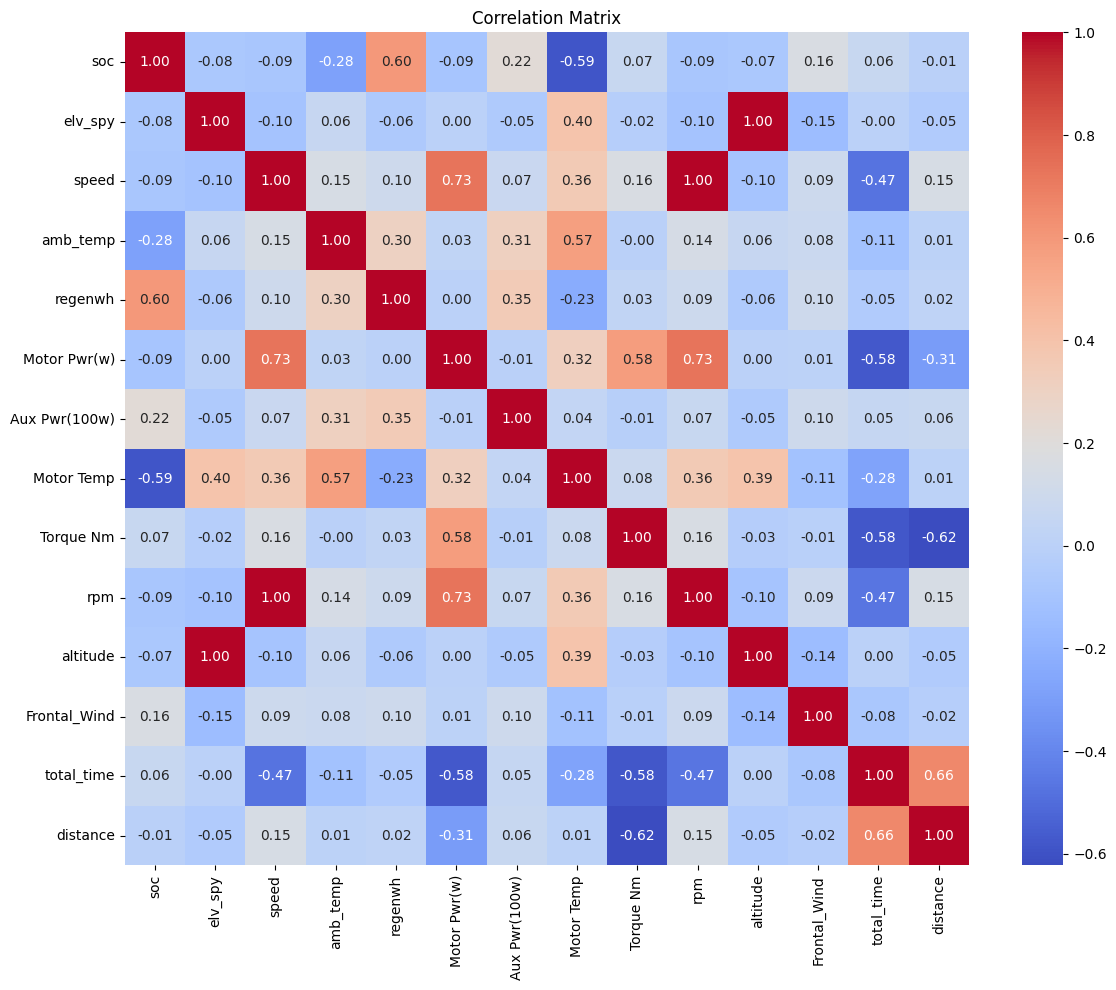

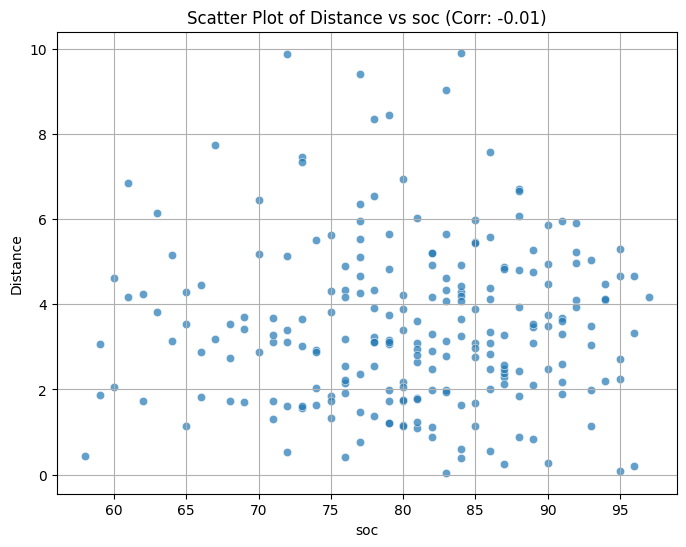

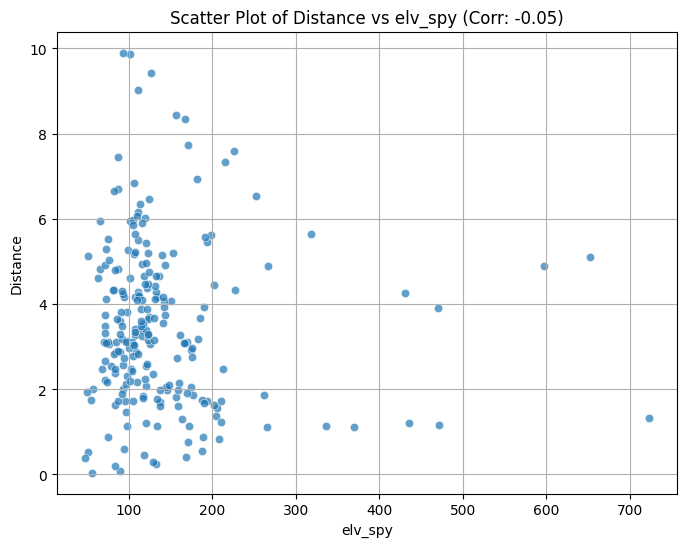

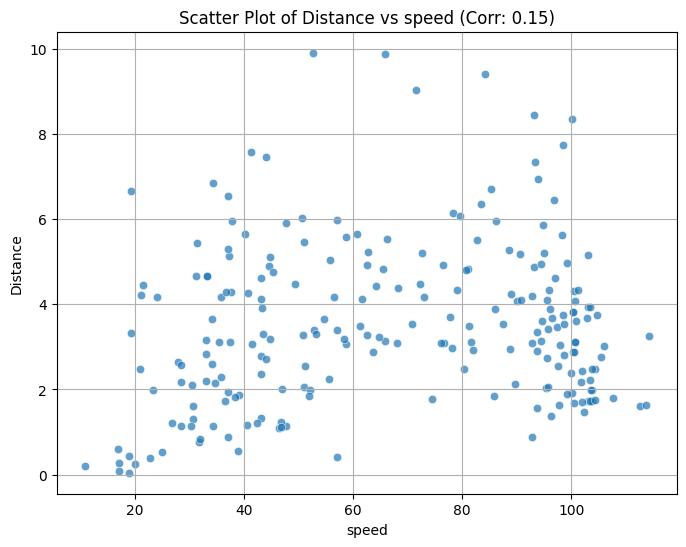

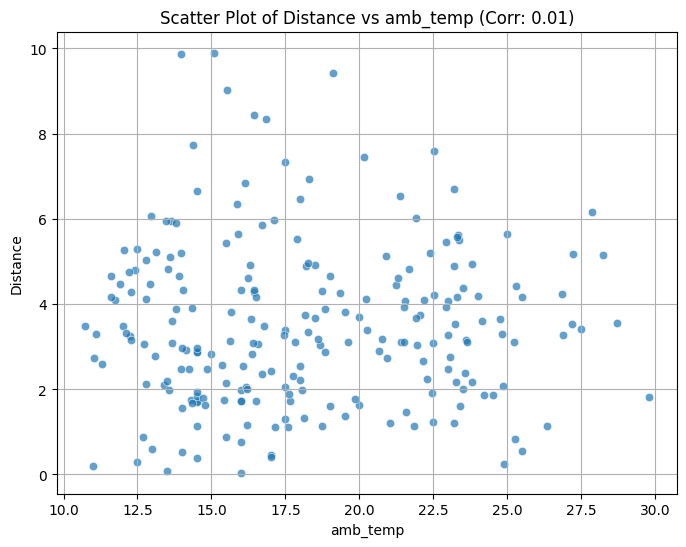

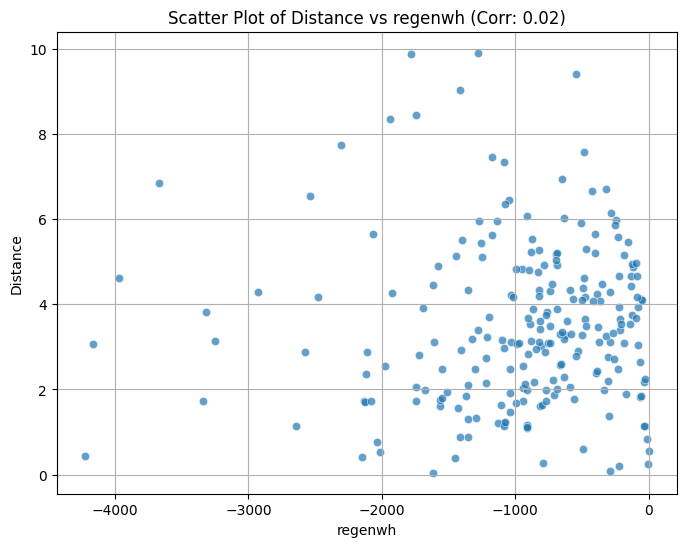

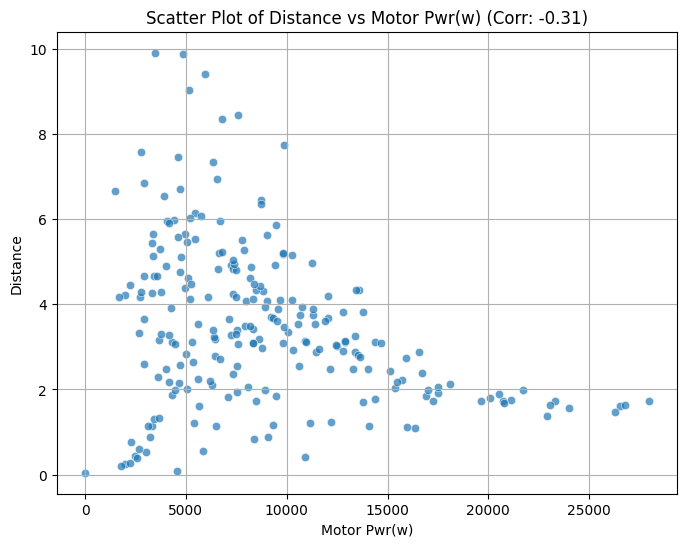

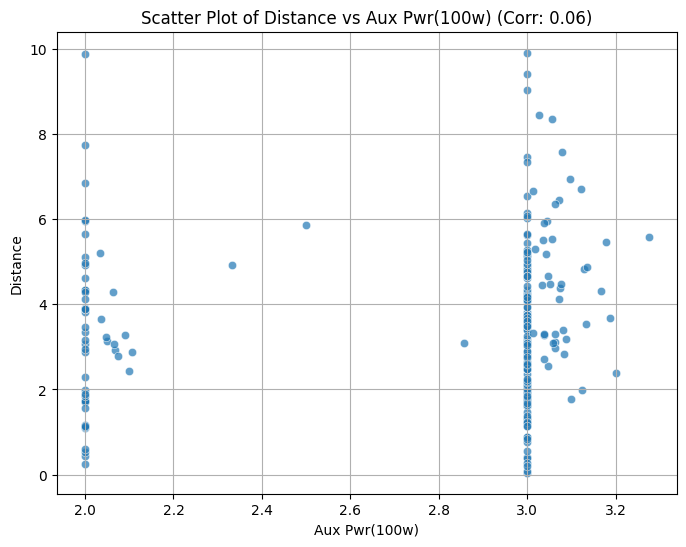

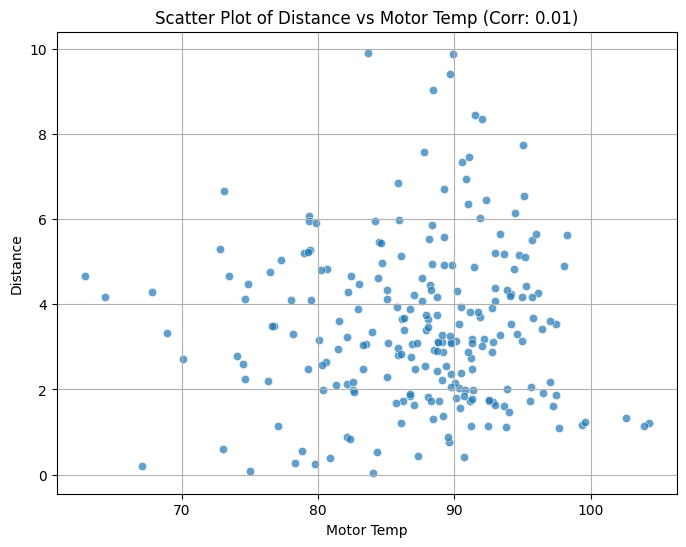

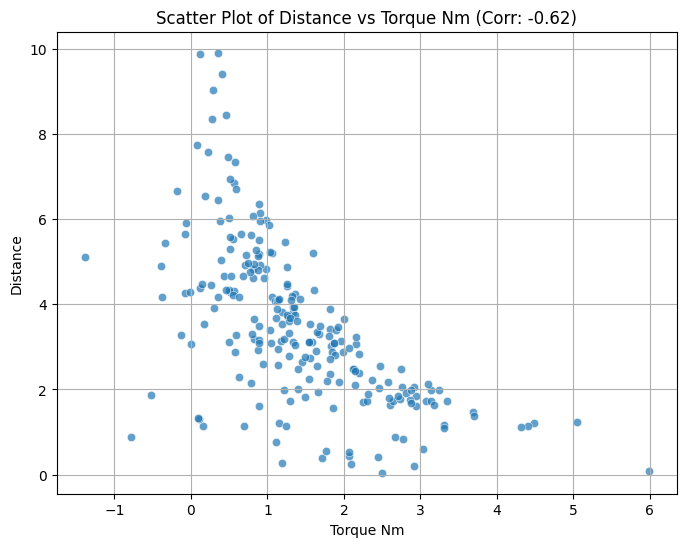

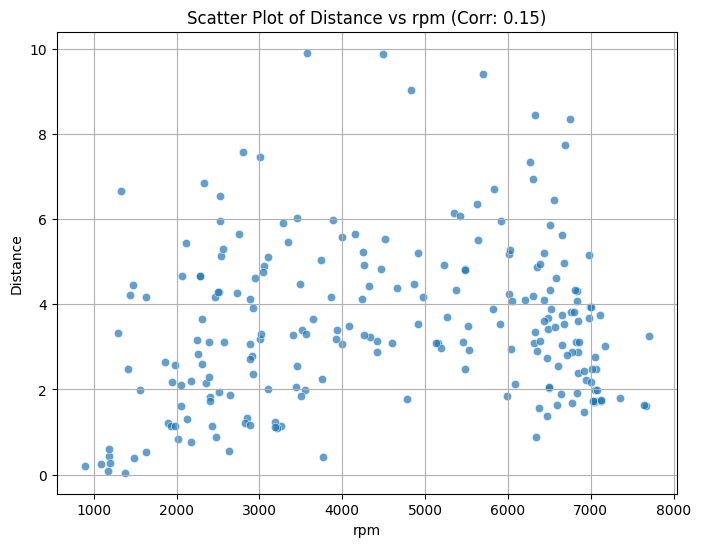

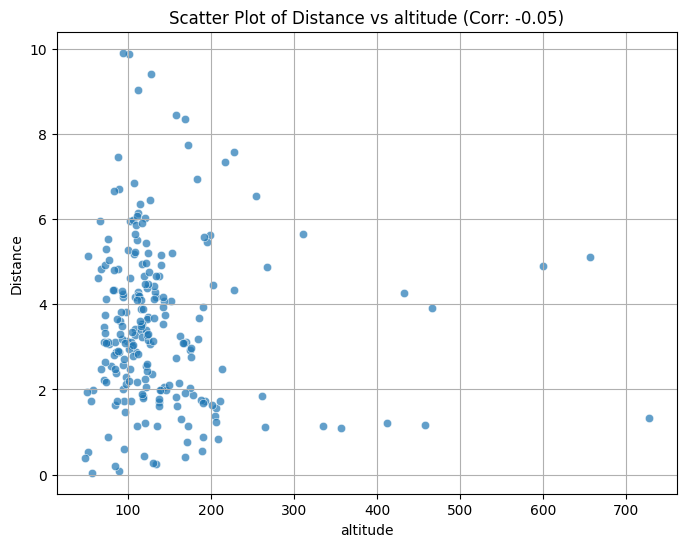

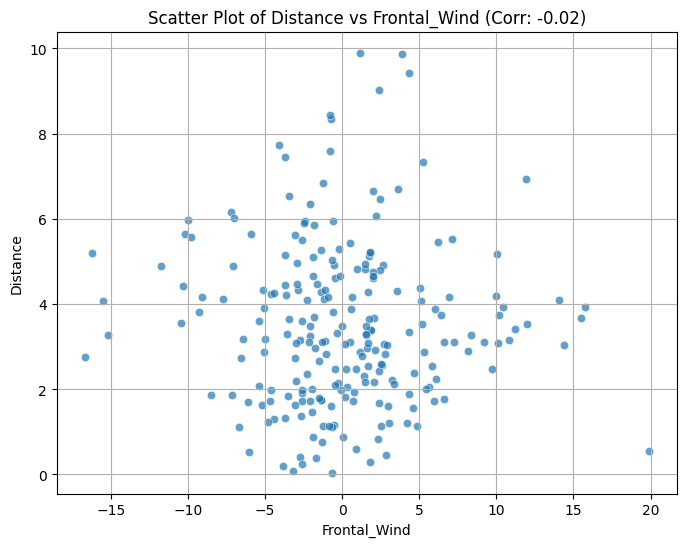

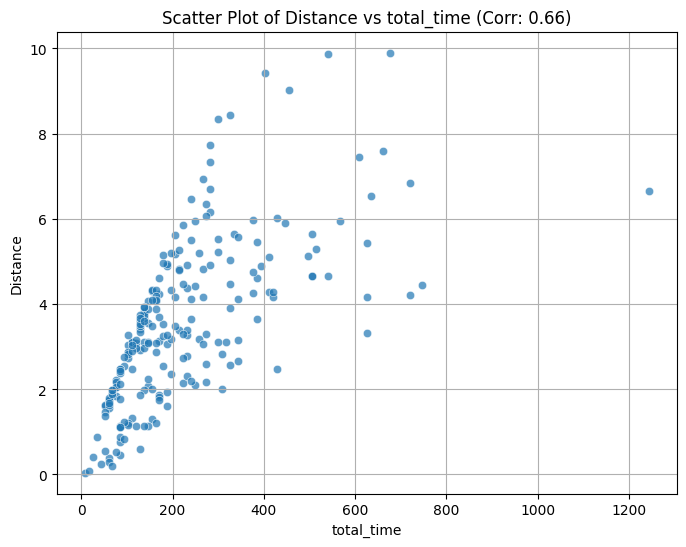

In [44]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Calculate correlation matrix from numeric columns
numeric_df = grouped_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Find the column with the highest absolute correlation with 'distance'
corr_with_distance = corr_matrix["distance"].drop("distance")  # Remove self-correlation
highest_corr_feature = corr_with_distance.abs().idxmax()
highest_corr_value = corr_with_distance[highest_corr_feature]

# Create and save heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()

# Save correlation matrix as PNG & EPS
png_path = os.path.join(png_folder, "correlation_matrix.png")
eps_path = os.path.join(eps_folder, "correlation_matrix.eps")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()

# --- Scatter Plots for ALL Numerical Columns vs Distance ---
for feature in numeric_df.columns:
    if feature == "distance":
        continue  # Skip self-correlation

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=grouped_df[feature], y=grouped_df["distance"], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Distance")
    plt.title(f"Scatter Plot of Distance vs {feature} (Corr: {corr_matrix['distance'][feature]:.2f})")
    plt.grid(True)

    # # Save scatter plots
    # scatter_png_path = os.path.join(png_folder, f"scatter_distance_vs_{feature}.png")
    # scatter_eps_path = os.path.join(eps_folder, f"scatter_distance_vs_{feature}.eps")
    # plt.savefig(scatter_png_path, format="png", dpi=300, bbox_inches="tight")
    # plt.savefig(scatter_eps_path, format="eps", bbox_inches="tight")

    # print(f"Scatter PNG saved at: {scatter_png_path}")
    # print(f"Scatter EPS saved at: {scatter_eps_path}")

    plt.show()


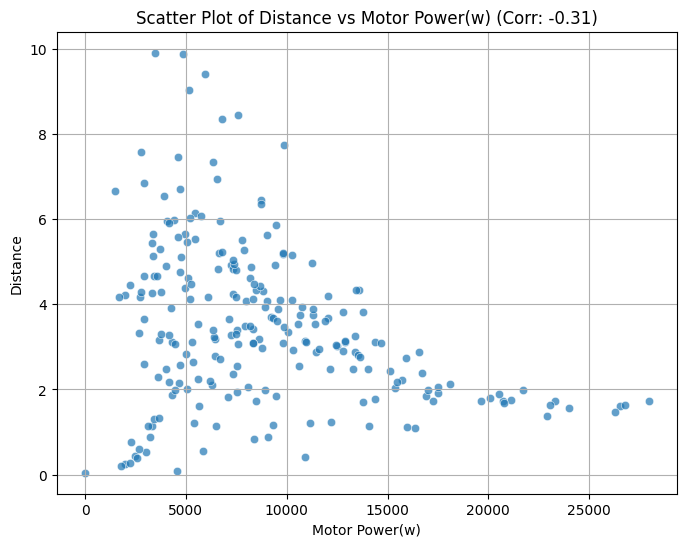

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature and rename for plotting
feature = "Motor Pwr(w)"
x_label = "Motor Power(w)"

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=grouped_df[feature], y=grouped_df["distance"], alpha=0.7)
plt.xlabel(x_label)
plt.ylabel("Distance")
plt.title(f"Scatter Plot of Distance vs {x_label} (Corr: {corr_matrix['distance'][feature]:.2f})")
plt.grid(True)
plt.show()


In [46]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the unnamed_png folder exists
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Feature to plot
feature = "Motor Pwr(w)"
x_label = "Motor Power(w)"

# Create the scatter plot
plt.figure(figsize=(5, 4.5))
sns.scatterplot(x=grouped_df[feature], y=grouped_df["distance"], alpha=0.7)
plt.xlabel(x_label, fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True)
plt.tight_layout()

# Save the figure
scatter_path = os.path.join(unnamed_png_folder, "scatter_distance_vs_motor_power.png")
plt.savefig(scatter_path, format="png", dpi=300, bbox_inches="tight")
print(f"Scatter plot saved at: {scatter_path}")
plt.show()


Scatter plot saved at: images\unamed_png\scatter_distance_vs_motor_power.png


Heatmap PNG saved at: images\unamed_png\correlation_matrix.png


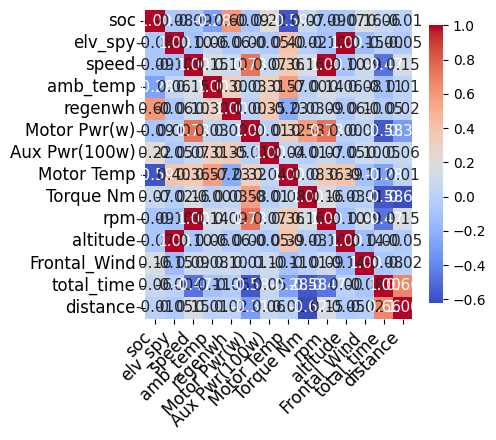

Scatter plot saved at: images\unamed_png\scatter_distance_vs_soc.png


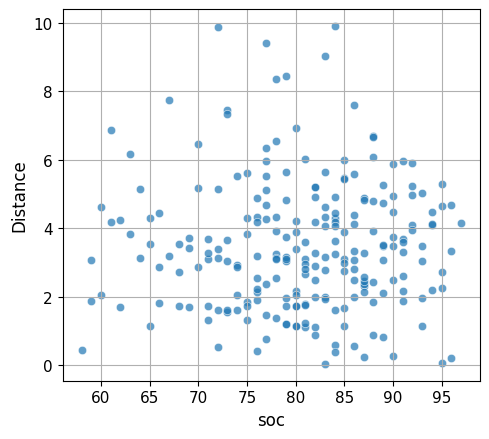

Scatter plot saved at: images\unamed_png\scatter_distance_vs_elv_spy.png


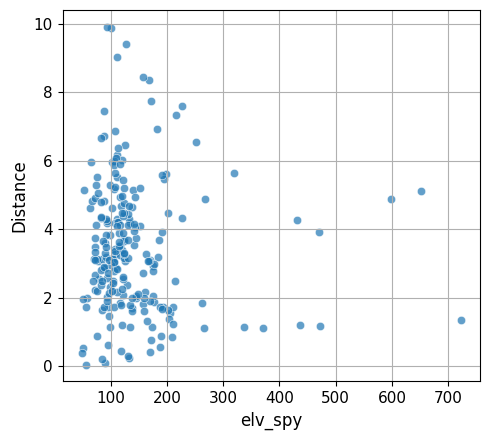

Scatter plot saved at: images\unamed_png\scatter_distance_vs_speed.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_amb_temp.png


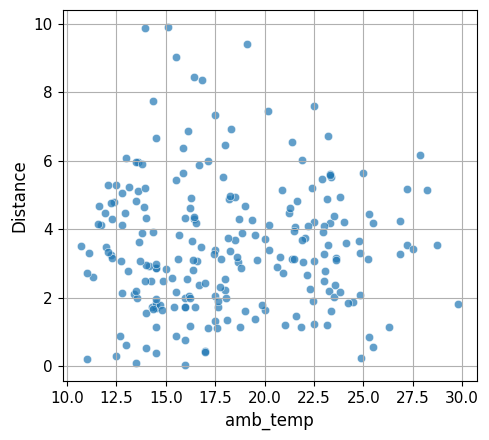

Scatter plot saved at: images\unamed_png\scatter_distance_vs_regenwh.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_Motor Pwr(w).png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_Aux Pwr(100w).png


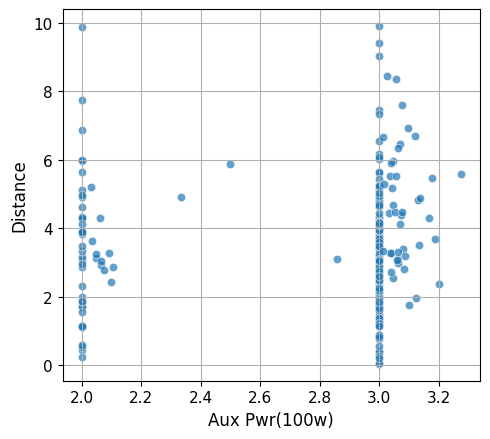

Scatter plot saved at: images\unamed_png\scatter_distance_vs_Motor Temp.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_Torque Nm.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_rpm.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_altitude.png


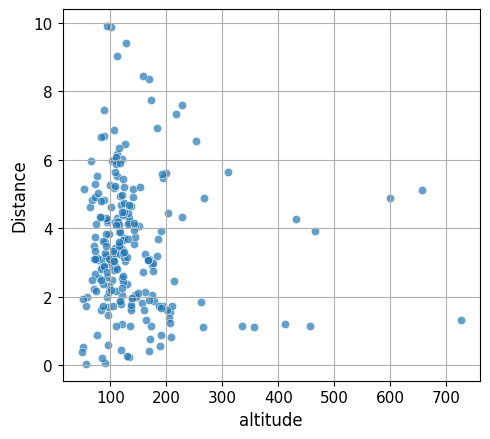

Scatter plot saved at: images\unamed_png\scatter_distance_vs_Frontal_Wind.png


Scatter plot saved at: images\unamed_png\scatter_distance_vs_total_time.png


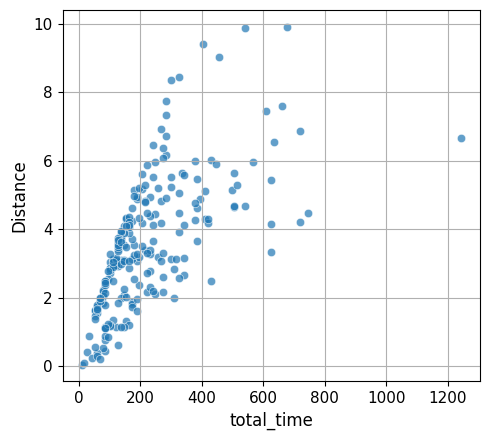

In [47]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the unnamed_png folder exists
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# --- Correlation Heatmap ---
numeric_df = grouped_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(5, 4.5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.9}
)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

heatmap_path = os.path.join(unnamed_png_folder, "correlation_matrix.png")
plt.savefig(heatmap_path, format="png", dpi=300, bbox_inches="tight")
print(f"Heatmap PNG saved at: {heatmap_path}")
plt.show()

# --- Scatter Plots vs Distance ---
for feature in numeric_df.columns:
    if feature == "distance":
        continue

    plt.figure(figsize=(5, 4.5))
    sns.scatterplot(x=grouped_df[feature], y=grouped_df["distance"], alpha=0.7)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Distance", fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True)
    plt.tight_layout()

    scatter_path = os.path.join(unnamed_png_folder, f"scatter_distance_vs_{feature}.png")
    plt.savefig(scatter_path, format="png", dpi=300, bbox_inches="tight")
    print(f"Scatter plot saved at: {scatter_path}")
    plt.show()


In [48]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the main folder and subfolders exist
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Select only numeric columns
numeric_df = grouped_df.select_dtypes(include=['number'])

# --- Shrink & Save Scatter Plots for ALL Numerical Columns vs Distance ---
for feature in numeric_df.columns:
    if feature == "distance":
        continue  # Skip self-correlation

    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.scatterplot(x=grouped_df[feature], y=grouped_df["distance"], alpha=0.5, s=10)  # Reduced point size
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Distance", fontsize=10)
    plt.title(f"Distance vs {feature}", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Save scatter plots
    scatter_png_path = os.path.join(png_folder, f"scatter_distance_vs_{feature}.png")
    scatter_eps_path = os.path.join(eps_folder, f"scatter_distance_vs_{feature}.eps")
    plt.savefig(scatter_png_path, format="png", dpi=200, bbox_inches="tight")
    plt.savefig(scatter_eps_path, format="eps", bbox_inches="tight")

    print(f"Saved PNG: {scatter_png_path}")
    print(f"Saved EPS: {scatter_eps_path}")

    plt.close()  # Close the figure to free memory


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_soc.png
Saved EPS: images\eps\scatter_distance_vs_soc.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_elv_spy.png
Saved EPS: images\eps\scatter_distance_vs_elv_spy.eps
Saved PNG: images\png\scatter_distance_vs_speed.png
Saved EPS: images\eps\scatter_distance_vs_speed.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_amb_temp.png
Saved EPS: images\eps\scatter_distance_vs_amb_temp.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_regenwh.png
Saved EPS: images\eps\scatter_distance_vs_regenwh.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_Motor Pwr(w).png
Saved EPS: images\eps\scatter_distance_vs_Motor Pwr(w).eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_Aux Pwr(100w).png
Saved EPS: images\eps\scatter_distance_vs_Aux Pwr(100w).eps
Saved PNG: images\png\scatter_distance_vs_Motor Temp.png
Saved EPS: images\eps\scatter_distance_vs_Motor Temp.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_Torque Nm.png
Saved EPS: images\eps\scatter_distance_vs_Torque Nm.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_rpm.png
Saved EPS: images\eps\scatter_distance_vs_rpm.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_altitude.png
Saved EPS: images\eps\scatter_distance_vs_altitude.eps
Saved PNG: images\png\scatter_distance_vs_Frontal_Wind.png
Saved EPS: images\eps\scatter_distance_vs_Frontal_Wind.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved PNG: images\png\scatter_distance_vs_total_time.png
Saved EPS: images\eps\scatter_distance_vs_total_time.eps


Numerical Data:

    Standardization or Normalization: Scaling numerical features is important, especially for algorithms sensitive to the scale of the input (e.g., gradient descent-based models, SVMs, k-NN, neural networks).
    Standardization (scaling to have zero mean and unit variance) or Normalization (scaling to a range, typically [0, 1]) can improve convergence and overall model performance.

Categorical Data:

    One-Hot Encoding (OHE): Converting categorical columns into numerical format via OHE is typically recommended. This creates binary columns for each category, allowing your model to process categorical information effectively.
    Note: Ensure that you only apply OHE to categorical features and watch out for high-cardinality issues, which might require other encoding techniques.

Target Variable ("distance"):

    Do Not Preprocess: Since "distance" is your target variable, you should leave it unchanged unless there's a specific reason to transform it (like correcting skewness). In most cases, your preprocessing steps should only be applied to the features.

In [49]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

target = 'distance'
numerical_features = grouped_df.select_dtypes(include=['number']).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target)
categorical_features = grouped_df.select_dtypes(exclude=['number']).columns.tolist()

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

preprocessed_array = preprocessor.fit_transform(grouped_df)
col_names = preprocessor.get_feature_names_out()
preprocessed_df = pd.DataFrame(preprocessed_array, columns=col_names)
X = preprocessed_df
y = grouped_df[target]


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Baseline Model Building 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K Neighbors': KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (r2, mse)
    print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")


Linear Regression - R2: 0.7366, MSE: 1.0896
Decision Tree - R2: 0.7086, MSE: 1.2054
Random Forest - R2: 0.8240, MSE: 0.7280
Gradient Boosting - R2: 0.9127, MSE: 0.3610
Support Vector Regressor - R2: 0.6610, MSE: 1.4023
K Neighbors - R2: 0.3255, MSE: 2.7903


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store residuals
residuals = {}

# Compute residuals for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals[name] = y_test - y_pred

# Plot PDF of residuals
plt.figure(figsize=(10, 6))
for name, res in residuals.items():
    sns.kdeplot(res, label=name, fill=True, alpha=0.3)

plt.axvline(0, color='black', linestyle='dashed', linewidth=1)  # Reference line at 0
plt.title("Probability Density Function of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store residuals
residuals = {}

# Compute residuals for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals[name] = y_test - y_pred

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Create a smaller figure (e.g., 5 inches by 4 inches) for a two-column paper
plt.figure(figsize=(5, 4))

# Plot the PDF of residuals for each model
for name, res in residuals.items():
    sns.kdeplot(res, label=name, fill=True, alpha=0.3)

# Add a reference vertical line at 0
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)

# Set the title and axis labels (with adjusted font sizes for the smaller figure)
plt.title("Probability Density Function of Residuals", fontsize=10)
plt.xlabel("Residuals", fontsize=8)
plt.ylabel("Density", fontsize=8)
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()

# Save the figure as a high-resolution PNG file
png_path = os.path.join(png_folder, "residuals_pdf.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save the figure as an EPS file
eps_path = os.path.join(eps_folder, "residuals_pdf.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\residuals_pdf.png
EPS saved at: images\eps\residuals_pdf.eps


PDF of residuals saved at: images\unamed_png\residuals_pdf.png


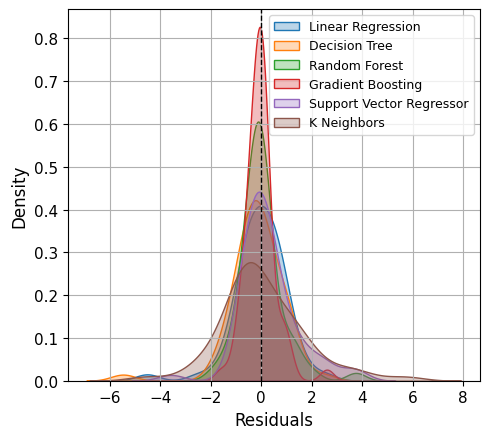

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder if it doesn't exist
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Dictionary to store residuals
residuals = {}

# Compute residuals for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals[name] = y_test - y_pred

# Plot PDF of residuals
plt.figure(figsize=(5, 4.5))
for name, res in residuals.items():
    sns.kdeplot(res, label=name, fill=True, alpha=0.3)

plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=9)
plt.grid(True)
plt.tight_layout()

# Save figure
pdf_path = os.path.join(unnamed_png_folder, "residuals_pdf.png")
plt.savefig(pdf_path, format="png", dpi=300, bbox_inches="tight")
print(f"PDF of residuals saved at: {pdf_path}")

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\residuals_distribution.png
EPS saved at: images\eps\residuals_distribution.eps


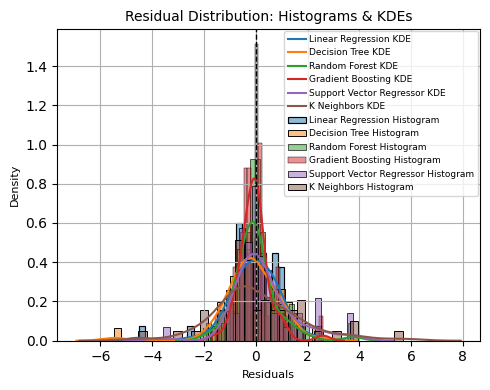

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store residuals
residuals = {}

# Compute residuals for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals[name] = y_test - y_pred

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Create a smaller figure (e.g., 5 inches by 4 inches)
plt.figure(figsize=(5, 4))

for name, res in residuals.items():
    # Histogram (binned density)
    sns.histplot(res, bins=30, stat="density", alpha=0.5, edgecolor='black', label=f'{name} Histogram')

    # KDE (smooth density line)
    sns.kdeplot(res, label=f'{name} KDE', linewidth=1.5)

# Reference line at 0
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)

# Adjust text sizes for a smaller figure
plt.title("Residual Distribution: Histograms & KDEs", fontsize=10)
plt.xlabel("Residuals", fontsize=8)
plt.ylabel("Density", fontsize=8)

# Modify the legend for a slightly smaller display
plt.legend(fontsize=6.5, handletextpad=0.4, borderaxespad=0.2, columnspacing=0.4, frameon=True)

plt.grid(True)
plt.tight_layout()

# Save the figure as a high-resolution PNG file
png_path = os.path.join(png_folder, "residuals_distribution.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save the figure as an EPS file
eps_path = os.path.join(eps_folder, "residuals_distribution.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


Saved at: images\unamed_png\residuals_scatter_plot.png


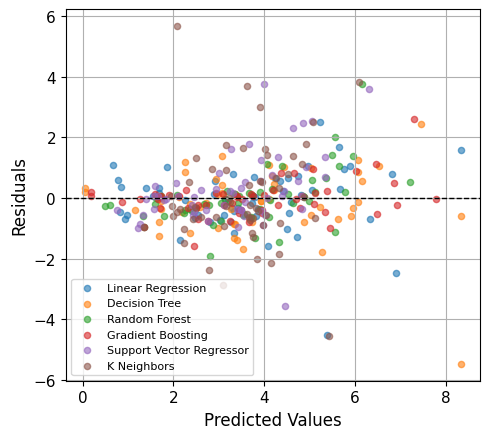

In [56]:
import os
import matplotlib.pyplot as plt

# Ensure the unamed_png directory exists
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Create the styled figure
plt.figure(figsize=(5, 4.5))

for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6, label=name, s=20)

# Reference line at 0 residual
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)

# Apply styling
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()

# Save figure
png_path = os.path.join(unnamed_png_folder, "residuals_scatter_plot.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

print(f"Saved at: {png_path}")
plt.show()


In [57]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Create a smaller figure (e.g., 5 inches by 4 inches)
plt.figure(figsize=(5, 4))

for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Scatter plot of residuals
    plt.scatter(y_pred, residuals, alpha=0.6, label=name, s=15)  # Reduced point size for clarity

# Reference line at 0 residual
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)

# Adjust text sizes for a smaller figure
plt.title("Residual Plots for Models", fontsize=10)
plt.xlabel("Predicted Values", fontsize=8)
plt.ylabel("Residuals", fontsize=8)

# Adjust legend for compact display
plt.legend(fontsize=7, handletextpad=0.4, borderaxespad=0.3, columnspacing=0.5, frameon=True)

plt.grid(True)
plt.tight_layout()

# Save the figure as PNG
png_path = os.path.join(png_folder, "residuals_scatter.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save the figure as EPS
eps_path = os.path.join(eps_folder, "residuals_scatter.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\residuals_scatter.png
EPS saved at: images\eps\residuals_scatter.eps


Saved at: images\unamed_png\true_vs_predicted.png


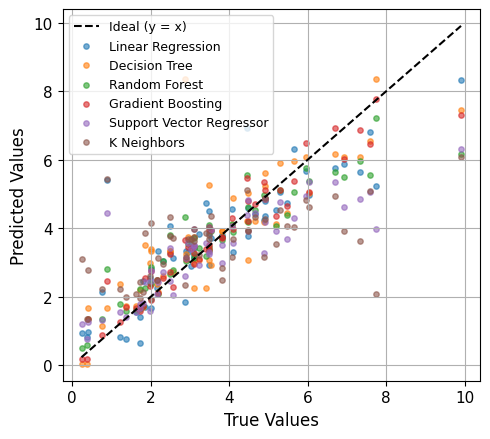

In [58]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory for unnamed PNGs
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Create figure with preferred styling
plt.figure(figsize=(5, 4.5))

# Plot the ideal reference line y = x
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, 'k--', label="Ideal (y = x)", linewidth=1.5)

# Scatter plots for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.6, label=name, s=15)

# Apply consistent style
plt.xlabel("True Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=9)
plt.grid(True)
plt.tight_layout()

# Save to unamed_png
png_path = os.path.join(unnamed_png_folder, "true_vs_predicted.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

print(f"Saved at: {png_path}")
plt.show()


Saved at: images\unamed_png\histogram_residuals.png


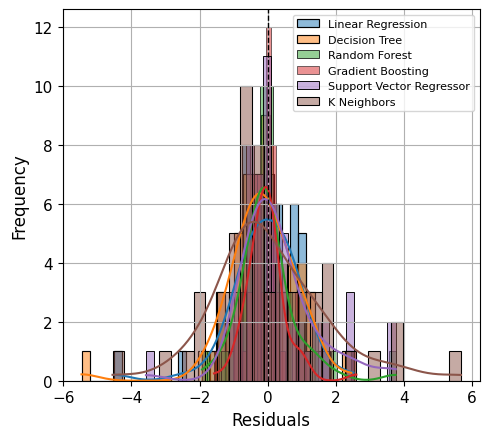

In [59]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Directory for unnamed PNGs
unnamed_png_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_png_folder, exist_ok=True)

# Create figure with consistent styling
plt.figure(figsize=(5, 4.5))

# Plot histogram and KDE for residuals from each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30, label=name, alpha=0.5, edgecolor='black')

# Vertical line at residual = 0
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)

# Style adjustments
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()

# Save as PNG
png_path = os.path.join(unnamed_png_folder, "histogram_residuals.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

print(f"Saved at: {png_path}")
plt.show()


PNG saved at: images\png\model_evaluation_metrics.png
EPS saved at: images\eps\model_evaluation_metrics.eps


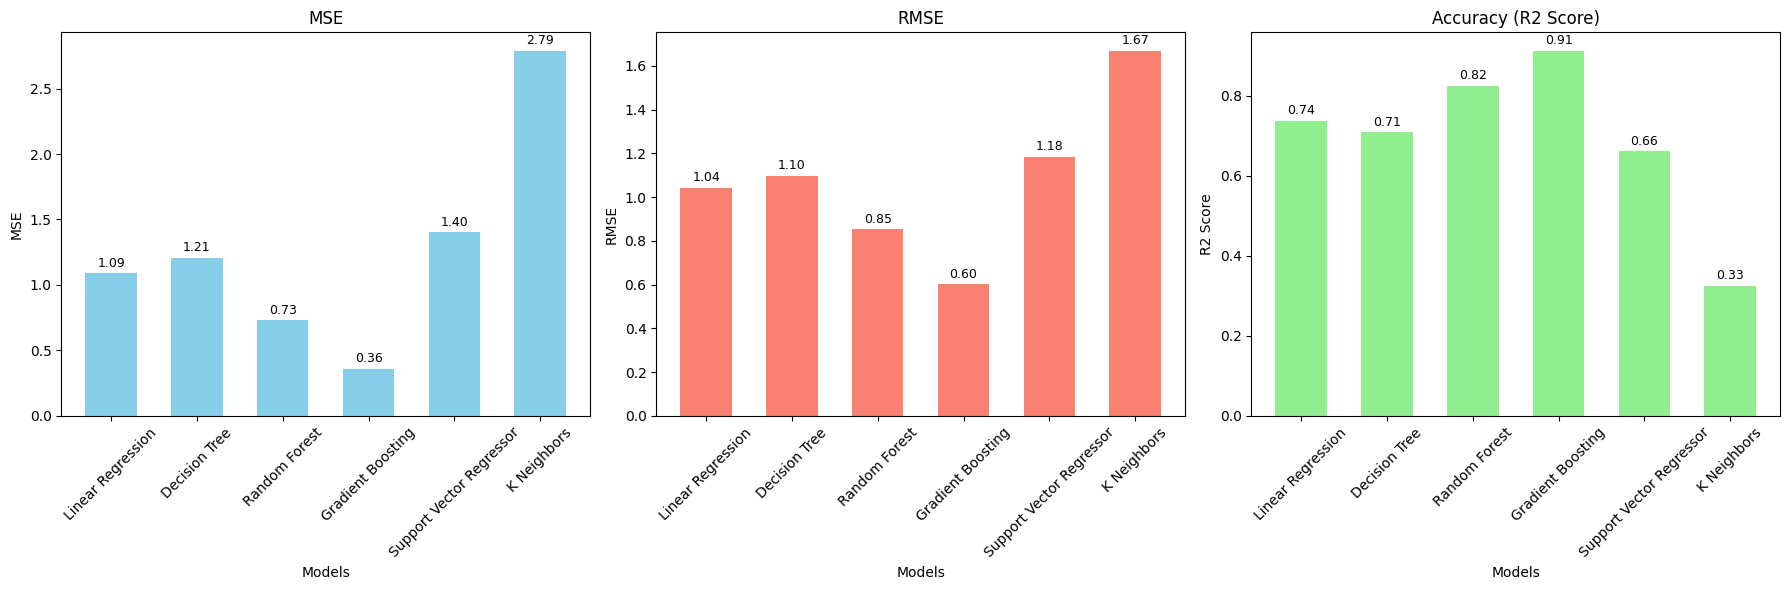

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Extract values from results
model_names = list(results.keys())
mse_values = [results[name][1] for name in model_names]
rmse_values = [np.sqrt(results[name][1]) for name in model_names]
accuracy_values = [results[name][0] for name in model_names]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bar_width = 0.6

def add_bar_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01 * max(values), f"{v:.2f}", ha='center', va='bottom', fontsize=9)

# MSE Plot
axs[0].bar(model_names, mse_values, color='skyblue', width=bar_width)
axs[0].set_title("MSE")
axs[0].set_xlabel("Models")
axs[0].set_ylabel("MSE")
axs[0].tick_params(axis='x', rotation=45)
add_bar_labels(axs[0], mse_values)

# RMSE Plot
axs[1].bar(model_names, rmse_values, color='salmon', width=bar_width)
axs[1].set_title("RMSE")
axs[1].set_xlabel("Models")
axs[1].set_ylabel("RMSE")
axs[1].tick_params(axis='x', rotation=45)
add_bar_labels(axs[1], rmse_values)

# R2 Score Plot
axs[2].bar(model_names, accuracy_values, color='lightgreen', width=bar_width)
axs[2].set_title("Accuracy (R2 Score)")
axs[2].set_xlabel("Models")
axs[2].set_ylabel("R2 Score")
axs[2].tick_params(axis='x', rotation=45)
add_bar_labels(axs[2], accuracy_values)

plt.tight_layout()

# Save as PNG
png_path = os.path.join(png_folder, "model_evaluation_metrics.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save as EPS
eps_path = os.path.join(eps_folder, "model_evaluation_metrics.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


In [62]:
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Train the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_pipeline.fit(grouped_df, grouped_df[target])

# Define save directories
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")

# Ensure directories exist
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Group data and generate plots
groups = grouped_df.groupby(['driver', 'route_code'])
for (driver, route_code), group in groups:
    group = group.copy()
    group = group.sort_values('total_time')
    group['cum_total_time'] = group['total_time'].cumsum()
    group['cum_distance'] = group['distance'].cumsum()
    group['predicted_distance'] = rf_pipeline.predict(group)
    group['cum_predicted_distance'] = group['predicted_distance'].cumsum()

    # Shrink figure size slightly
    plt.figure(figsize=(8, 5))  

    # Plot actual vs predicted cumulative distance
    plt.plot(group['cum_total_time'], group['cum_distance'], marker='o', linestyle='-', label='Actual Distance')
    plt.plot(group['cum_total_time'], group['cum_predicted_distance'], marker='x', linestyle='--', label='Predicted Distance')
    plt.xlabel('Cumulative Total Time (seconds)')
    plt.ylabel('Cumulative Distance')
    plt.title(f'Distance vs Time\nDriver: {driver}, Route: {route_code}')
    plt.legend()
    plt.grid(True)

    # Generate filenames dynamically
    safe_driver = str(driver).replace(" ", "_")
    safe_route = str(route_code).replace(" ", "_")
    png_path = os.path.join(png_folder, f"distance_vs_time_{safe_driver}_{safe_route}.png")
    eps_path = os.path.join(eps_folder, f"distance_vs_time_{safe_driver}_{safe_route}.eps")

    # Save the figure
    plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")
    plt.savefig(eps_path, format="eps", bbox_inches="tight")

    print(f"PNG saved at: {png_path}")
    print(f"EPS saved at: {eps_path}")

    plt.close()  # Close plot to free memory


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d1_ANDOAIN_to_AZPEITIA.png
EPS saved at: images\eps\distance_vs_time_d1_ANDOAIN_to_AZPEITIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d1_DONOSTIA_to_IRUN.png
EPS saved at: images\eps\distance_vs_time_d1_DONOSTIA_to_IRUN.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d1_IRUN_to_ANDOAIN.png
EPS saved at: images\eps\distance_vs_time_d1_IRUN_to_ANDOAIN.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d1_ULIA_to_HERNANI.png
EPS saved at: images\eps\distance_vs_time_d1_ULIA_to_HERNANI.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_AZPEITIA_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d2_AZPEITIA_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_DONOSTIA_to_HERNANI.png
EPS saved at: images\eps\distance_vs_time_d2_DONOSTIA_to_HERNANI.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_DONOSTIA_to_ULIA.png
EPS saved at: images\eps\distance_vs_time_d2_DONOSTIA_to_ULIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_HERNANI_to_TOLOSA.png
EPS saved at: images\eps\distance_vs_time_d2_HERNANI_to_TOLOSA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_TOLOSA_to_ZARAUTZ.png
EPS saved at: images\eps\distance_vs_time_d2_TOLOSA_to_ZARAUTZ.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d2_ZARAUTZ_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d2_ZARAUTZ_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_ANDOAIN_to_AZPEITIA.png
EPS saved at: images\eps\distance_vs_time_d3_ANDOAIN_to_AZPEITIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_AZPEITIA_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d3_AZPEITIA_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_DONOSTIA_to_HERNANI.png
EPS saved at: images\eps\distance_vs_time_d3_DONOSTIA_to_HERNANI.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_EIBAR_to_BILBAO.png
EPS saved at: images\eps\distance_vs_time_d3_EIBAR_to_BILBAO.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_HERNANI_to_EIBAR.png
EPS saved at: images\eps\distance_vs_time_d3_HERNANI_to_EIBAR.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_HERNANI_to_TOLOSA.png
EPS saved at: images\eps\distance_vs_time_d3_HERNANI_to_TOLOSA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_IRUN_to_ANDOAIN.png
EPS saved at: images\eps\distance_vs_time_d3_IRUN_to_ANDOAIN.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_TOLOSA_to_ZARAUTZ.png
EPS saved at: images\eps\distance_vs_time_d3_TOLOSA_to_ZARAUTZ.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d3_ZARAUTZ_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d3_ZARAUTZ_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_BILBAO_to_EIBAR.png
EPS saved at: images\eps\distance_vs_time_d4_BILBAO_to_EIBAR.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_DONOSTIA_to_HERNANI.png
EPS saved at: images\eps\distance_vs_time_d4_DONOSTIA_to_HERNANI.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_DONOSTIA_to_IRUN.png
EPS saved at: images\eps\distance_vs_time_d4_DONOSTIA_to_IRUN.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_DONOSTIA_to_TOLOSA.png
EPS saved at: images\eps\distance_vs_time_d4_DONOSTIA_to_TOLOSA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_EIBAR_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d4_EIBAR_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_HERNANI_to_TOLOSA.png
EPS saved at: images\eps\distance_vs_time_d4_HERNANI_to_TOLOSA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_TOLOSA_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d4_TOLOSA_to_DONOSTIA.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_TOLOSA_to_ZARAUTZ.png
EPS saved at: images\eps\distance_vs_time_d4_TOLOSA_to_ZARAUTZ.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\distance_vs_time_d4_ZARAUTZ_to_DONOSTIA.png
EPS saved at: images\eps\distance_vs_time_d4_ZARAUTZ_to_DONOSTIA.eps


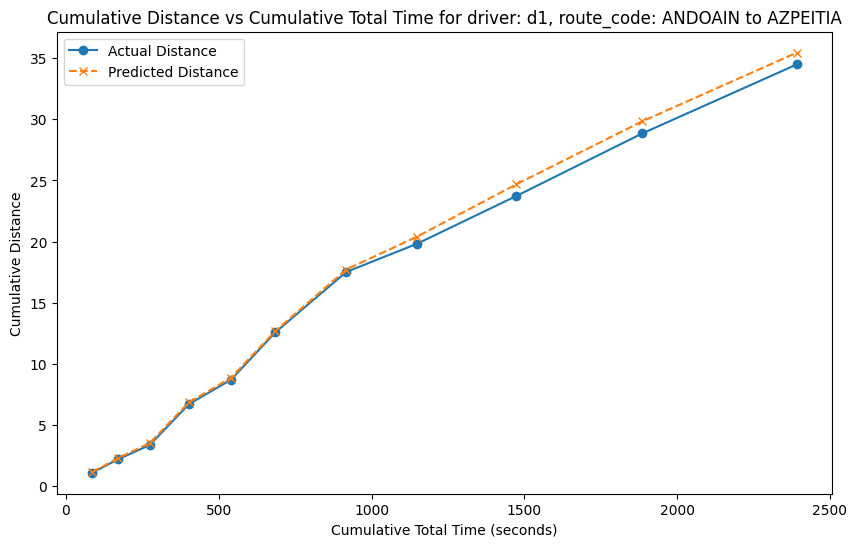

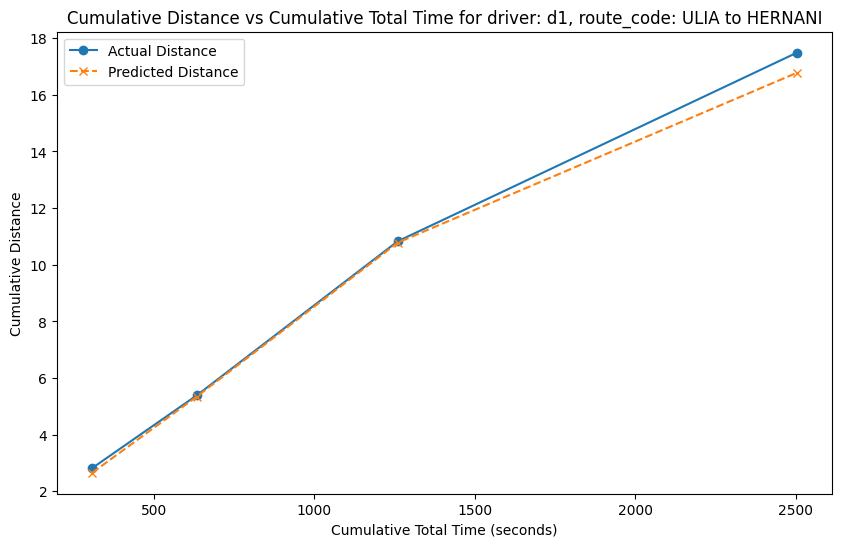

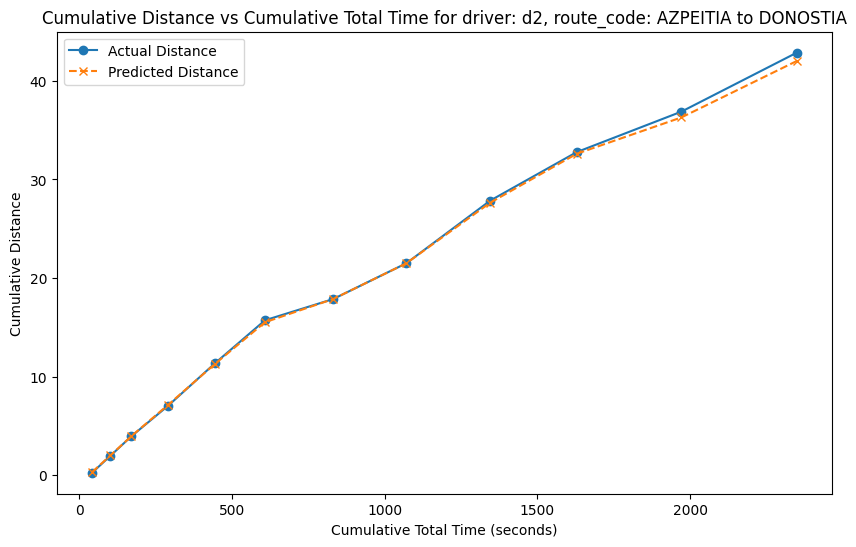

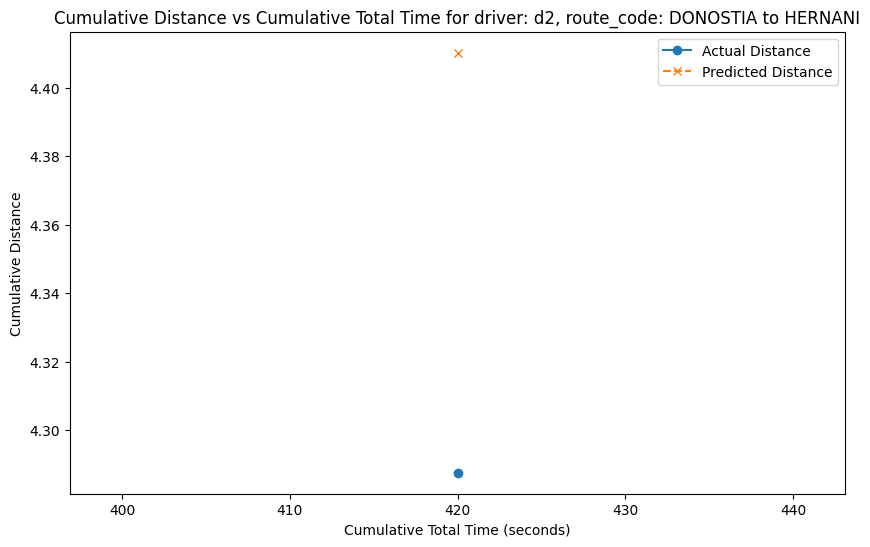

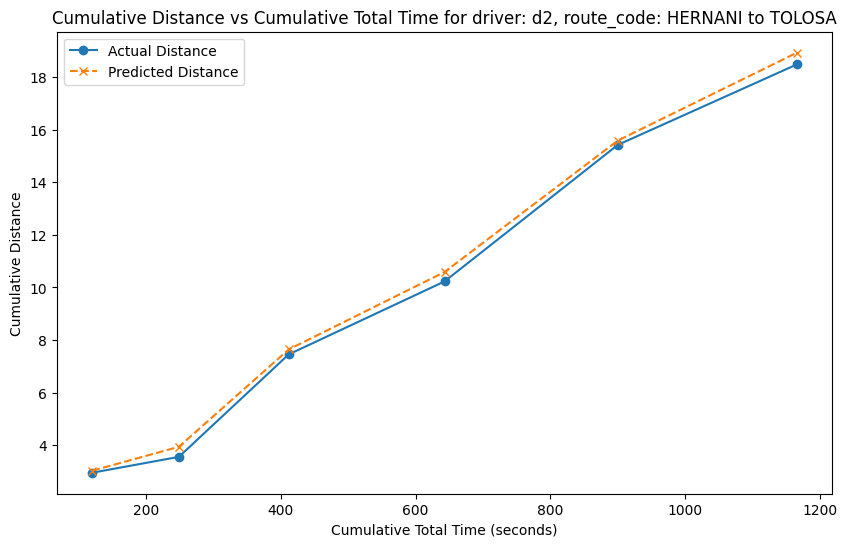

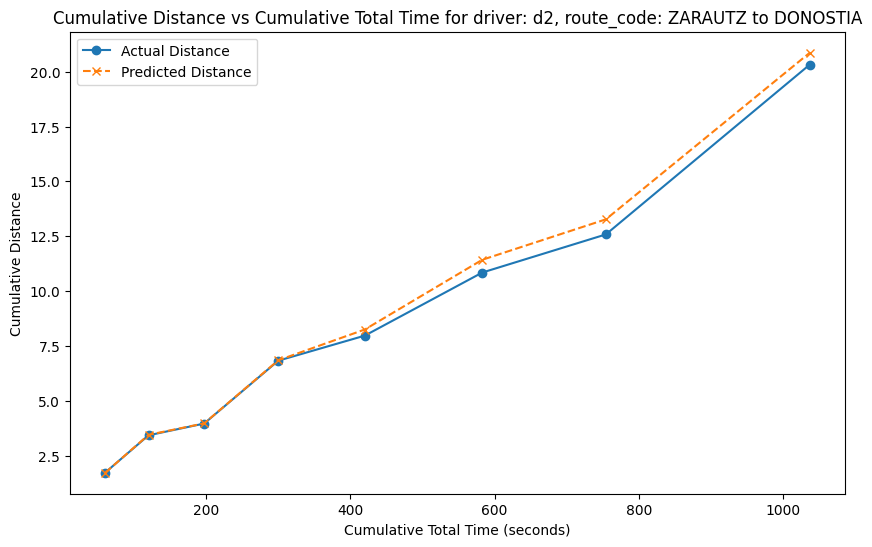

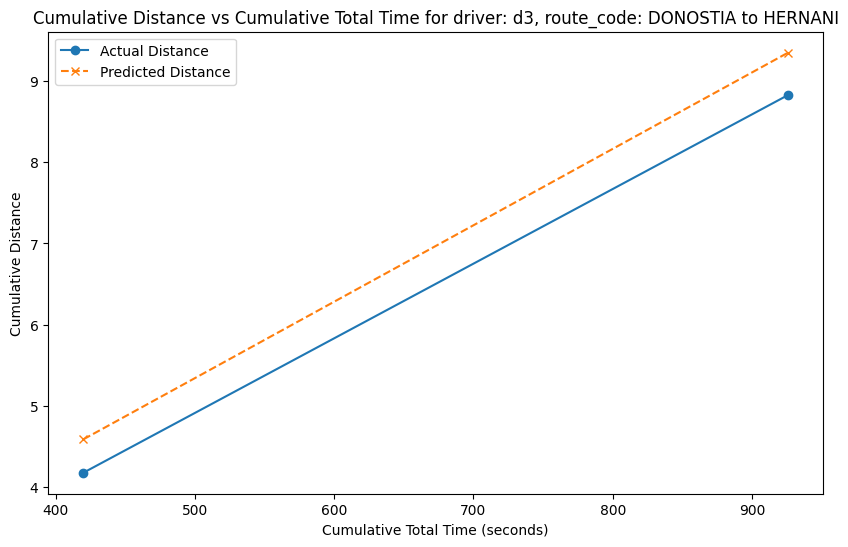

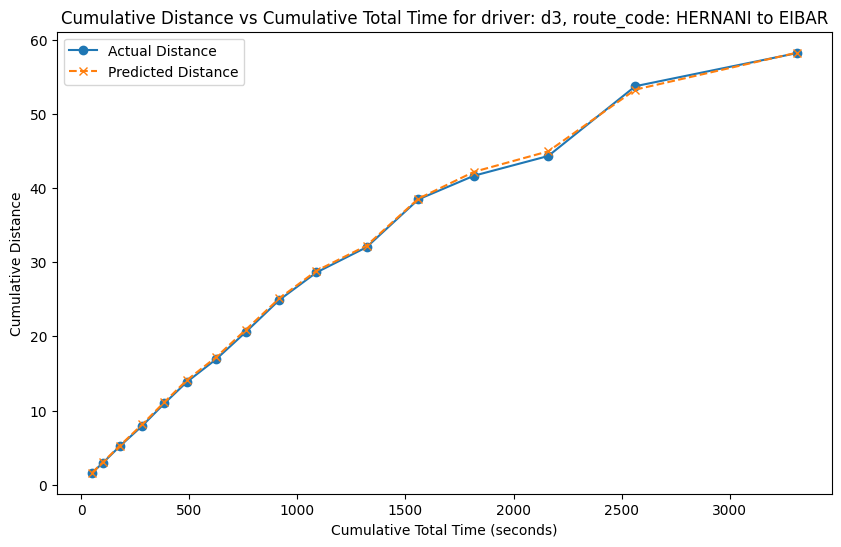

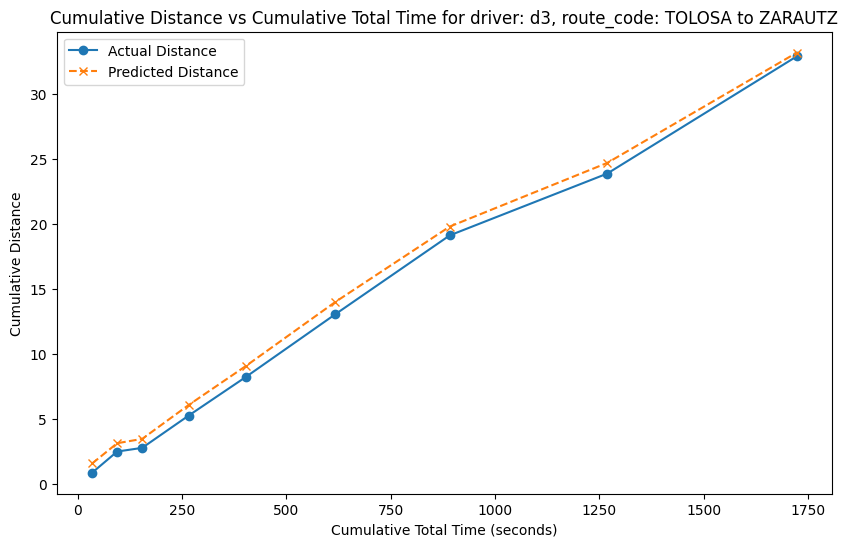

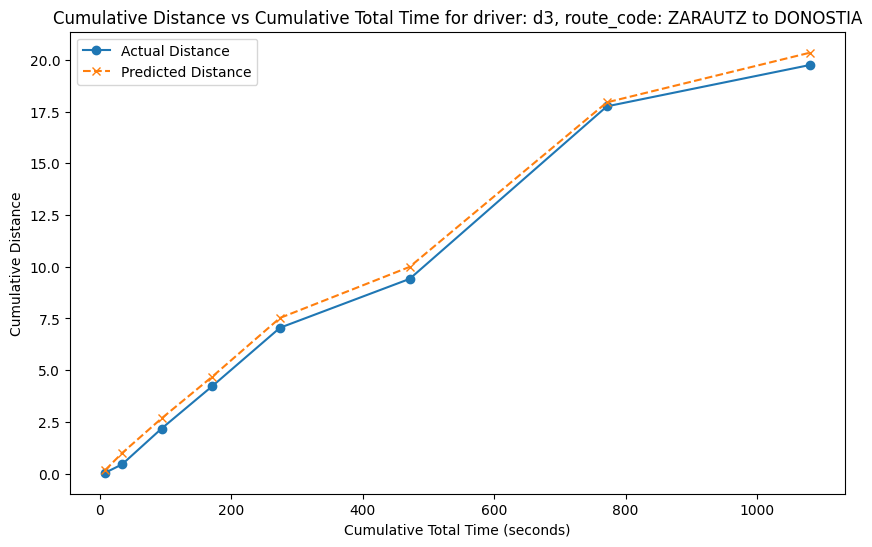

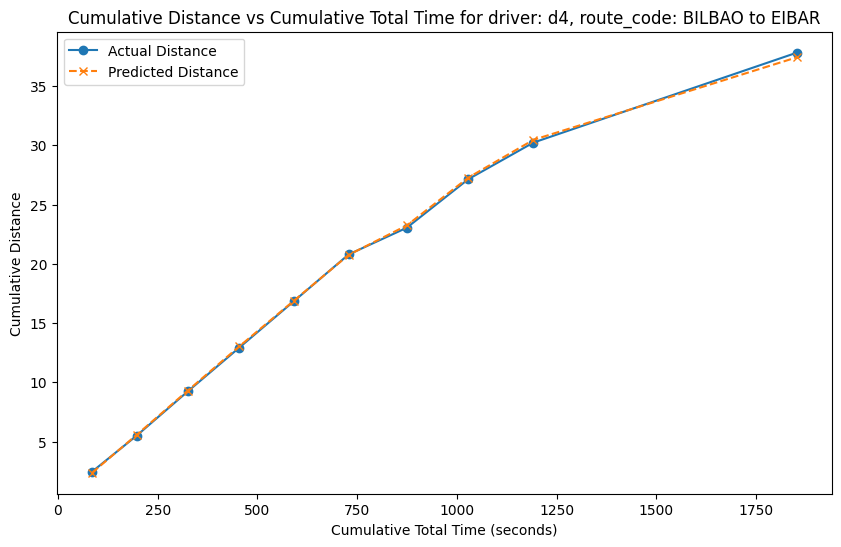

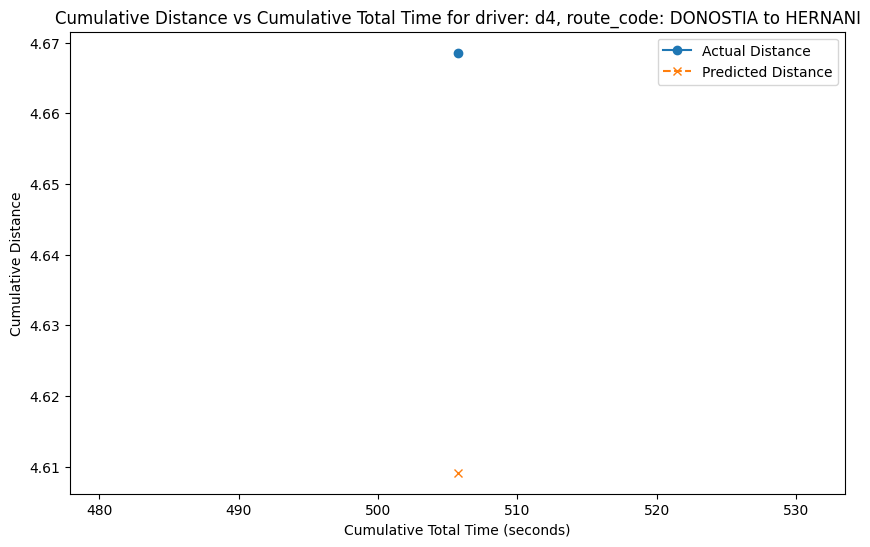

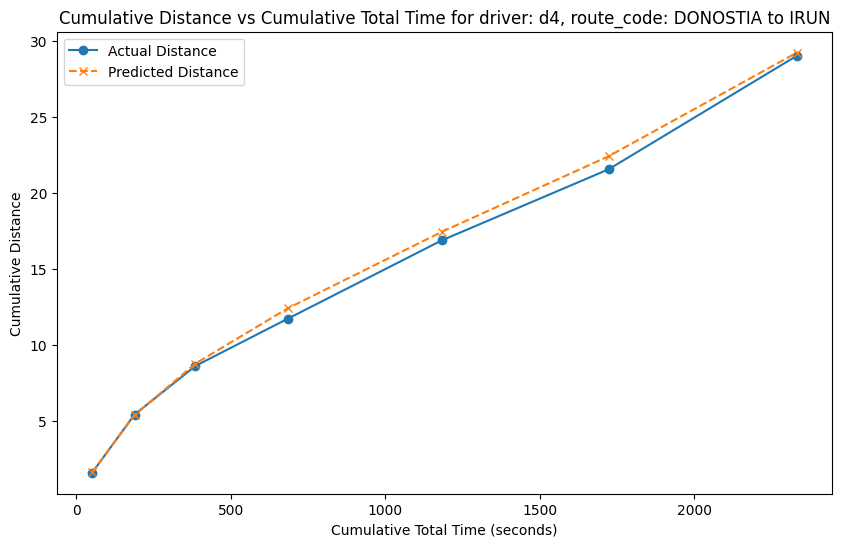

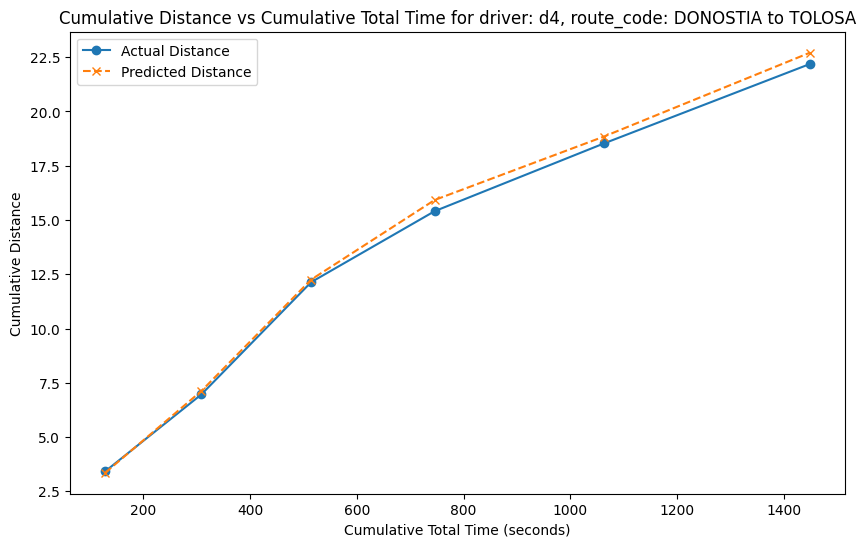

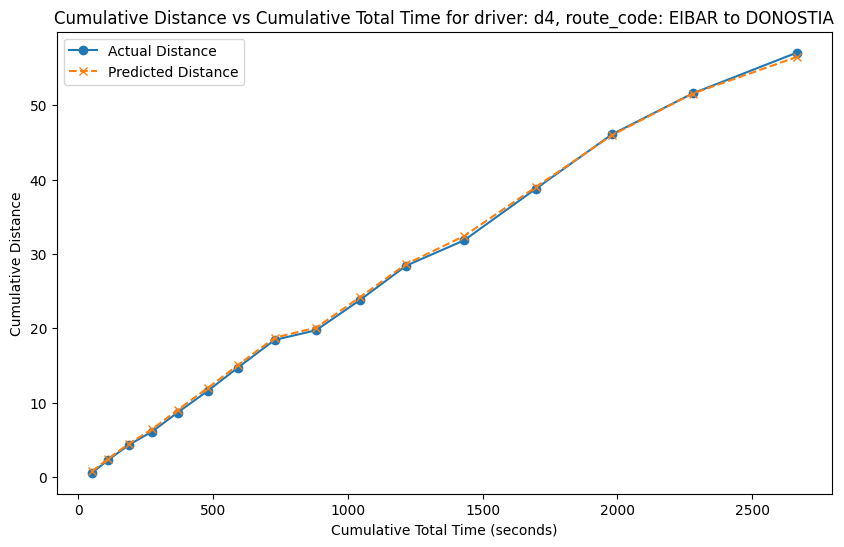

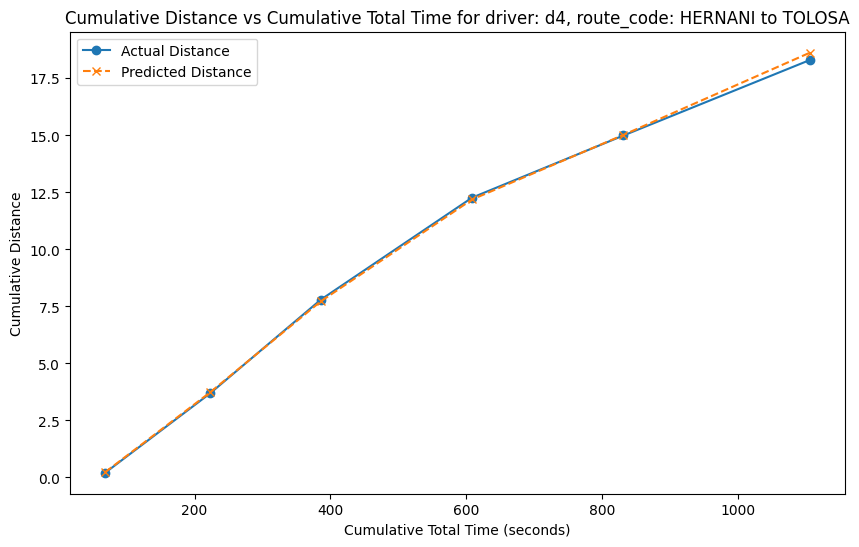

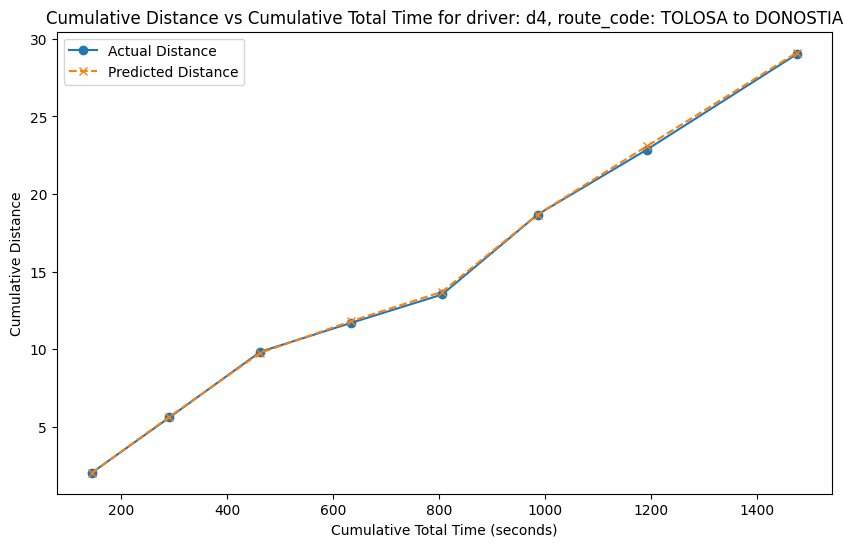

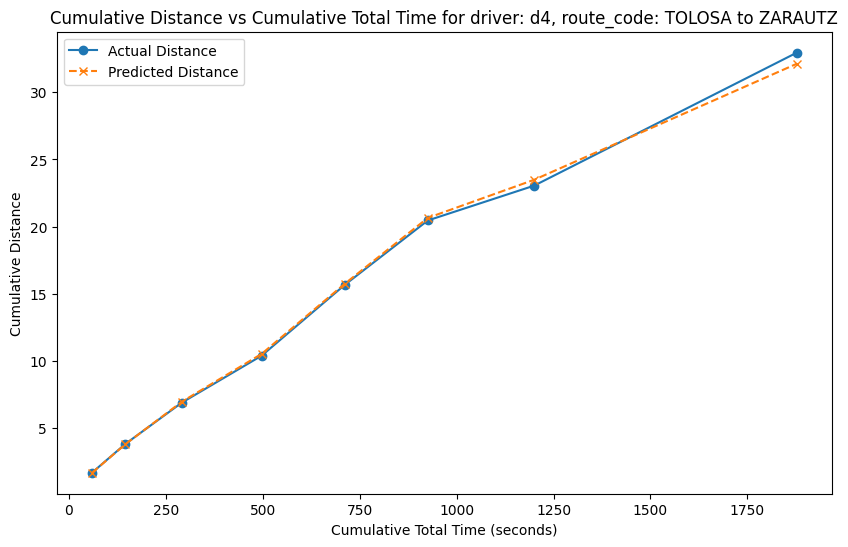

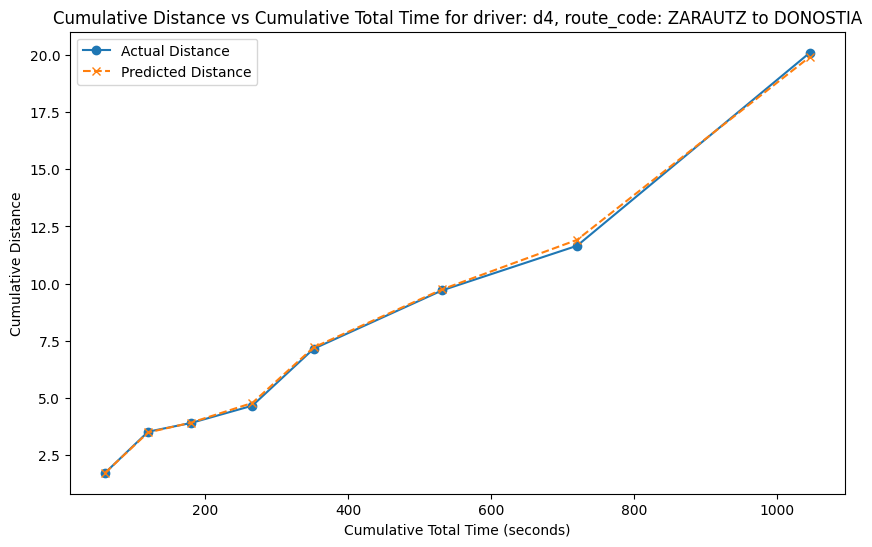

In [63]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_pipeline.fit(grouped_df, grouped_df[target])

groups = grouped_df.groupby(['driver', 'route_code'])
for (driver, route_code), group in groups:
    group = group.copy()
    group = group.sort_values('total_time')
    group['cum_total_time'] = group['total_time'].cumsum()
    group['cum_distance'] = group['distance'].cumsum()
    group['predicted_distance'] = rf_pipeline.predict(group)
    group['cum_predicted_distance'] = group['predicted_distance'].cumsum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(group['cum_total_time'], group['cum_distance'], marker='o', linestyle='-', label='Actual Distance')
    plt.plot(group['cum_total_time'], group['cum_predicted_distance'], marker='x', linestyle='--', label='Predicted Distance')
    plt.xlabel('Cumulative Total Time (seconds)')
    plt.ylabel('Cumulative Distance')
    plt.title(f'Cumulative Distance vs Cumulative Total Time for driver: {driver}, route_code: {route_code}')
    plt.legend()
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\predicted_vs_actual_distance.png
EPS saved at: images\eps\predicted_vs_actual_distance.eps


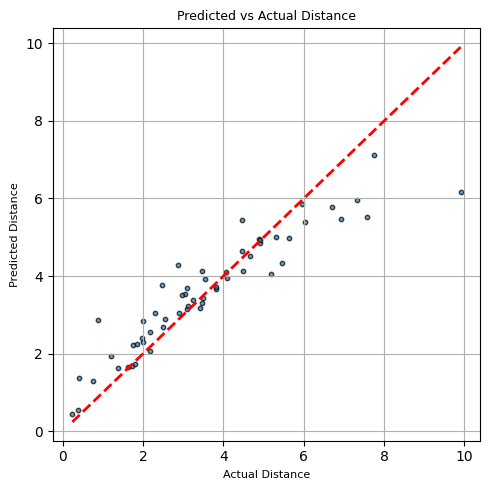

In [65]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Use the original grouped_df for splitting
X_orig = grouped_df.drop(columns=[target])
y_orig = grouped_df[target]

X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.25, random_state=42)

# Fit the Random Forest pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_pipeline.predict(X_test)

# Create a **smaller** figure (e.g., 5 inches by 5 inches)
plt.figure(figsize=(5, 5))

# Scatter plot of actual vs predicted distance
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k', s=10)  # Smaller points for better clarity
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line

# Adjust labels, title, and tick sizes
plt.xlabel("Actual Distance", fontsize=8)
plt.ylabel("Predicted Distance", fontsize=8)
plt.title("Predicted vs Actual Distance", fontsize=9)
plt.grid(True)
plt.tight_layout()

# Save as PNG
png_path = os.path.join(png_folder, "predicted_vs_actual_distance.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save as EPS
eps_path = os.path.join(eps_folder, "predicted_vs_actual_distance.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PNG saved at: images\png\actual_vs_predicted_distance.png
EPS saved at: images\eps\actual_vs_predicted_distance.eps


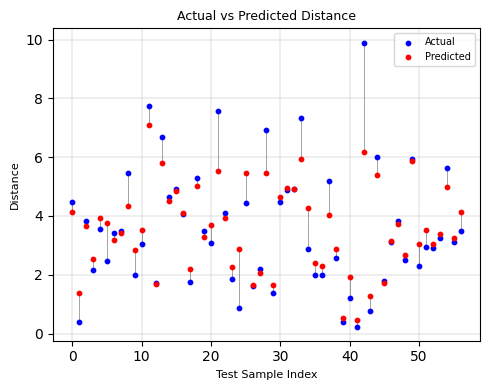

In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Create directories for saving the plots
main_folder = "images"
png_folder = os.path.join(main_folder, "png")
eps_folder = os.path.join(main_folder, "eps")
os.makedirs(png_folder, exist_ok=True)
os.makedirs(eps_folder, exist_ok=True)

# Predict values on the test set using the fitted Random Forest pipeline
y_pred = rf_pipeline.predict(X_test)
x_positions = np.arange(len(y_test))

# Create a **smaller** figure (e.g., 5 inches by 4 inches)
plt.figure(figsize=(5, 4))

# Scatter plot for actual and predicted values
plt.scatter(x_positions, y_test, color='blue', label='Actual', zorder=3, s=10)
plt.scatter(x_positions, y_pred, color='red', label='Predicted', zorder=3, s=10)

# Connecting lines between actual and predicted values
for i in range(len(y_test)):
    plt.plot([x_positions[i], x_positions[i]], [y_test.iloc[i], y_pred[i]], 'k-', alpha=0.5, linewidth=0.5)

# Adjust labels, title, and tick sizes
plt.xlabel('Test Sample Index', fontsize=8)
plt.ylabel('Distance', fontsize=8)
plt.title('Actual vs Predicted Distance', fontsize=9)
plt.legend(fontsize=7)
plt.grid(True, linewidth=0.3)
plt.tight_layout()

# Save as PNG
png_path = os.path.join(png_folder, "actual_vs_predicted_distance.png")
plt.savefig(png_path, format="png", dpi=300, bbox_inches="tight")

# Save as EPS
eps_path = os.path.join(eps_folder, "actual_vs_predicted_distance.eps")
plt.savefig(eps_path, format="eps", bbox_inches="tight")

print(f"PNG saved at: {png_path}")
print(f"EPS saved at: {eps_path}")

plt.show()


# LSTM MODEL Building

In [68]:
import pandas as pd

df = pd.read_csv("combined_nissan_leaf.csv")

df.head()


timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  ...  \
0          1520              2          90  ...   
1          6200              2          89  ...   
2          9480              2          89  ...   
3          1960              2          89  ...   
4             0              2          88  ...   

   cars_by_speed_interval_80_100  cars_by_speed_interval_100_120  \
0                           47.0                           239.0   
1                           47.0                           239.0   
2                           47.0                           239.0   
3                           47.0                           239.0   
4                           47.0                           239.0   

   cars_by_speed_interval_0_50  cars_by_speed_interval_50_80  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

   cars_by_speed_interval_80_120  cars_by_speed_interval_120_inf  \
0                            NaN                           102.0   
1                            NaN                           102.0   
2                            NaN                           102.0   
3                            NaN                           102.0   
4                            NaN                           102.0   

  cars_by_length_interval_0_7  cars_by_length_interval_7_inf  max_speed radius  
0                       271.0                          118.0         30    3.0  
1                       271.0                          118.0         30    3.0  
2                       271.0                          118.0         55    3.0  
3                       271.0                          118.0         25    3.0  
4                       271.0                          118.0         90    3.0  

[5 rows x 49 columns]

C:\Users\ashis\AppData\Local\Temp\ipykernel_3416\1617532758.py:25: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  pickle.dump(fig, f)


Figure saved at: images\nan_values_filtered.fig
SVG saved at: images\nan_values_filtered.svg


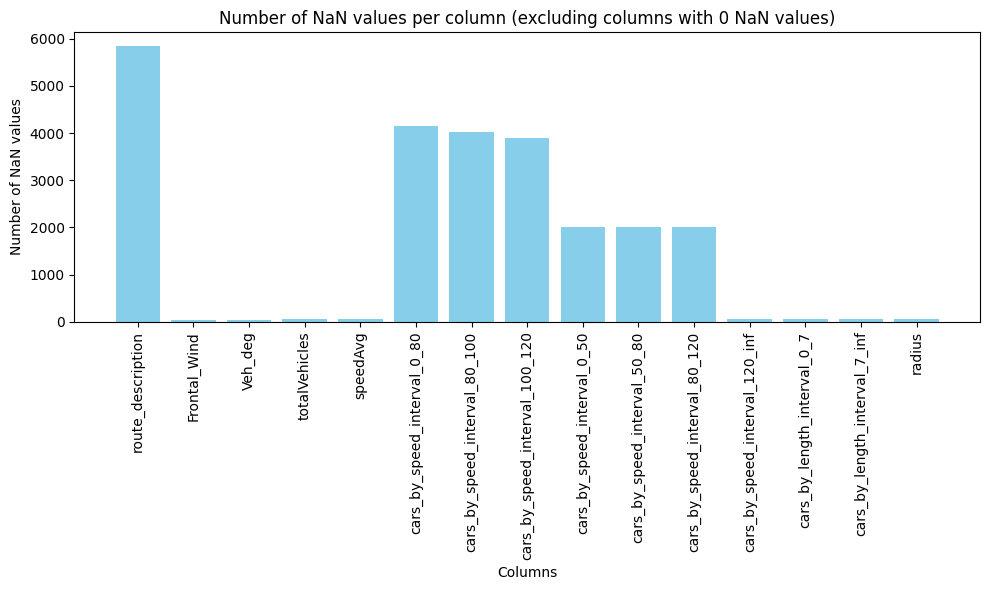

In [69]:
import os
import matplotlib.pyplot as plt
import pickle

# Ensure the folder exists
folder_name = "images"
os.makedirs(folder_name, exist_ok=True)

# Compute NaN counts, excluding columns with 0 NaN values
nan_count = df.isna().sum()
nan_count = nan_count[nan_count > 0]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(nan_count.index, nan_count.values, color='skyblue')
ax.set_xlabel("Columns")
ax.set_ylabel("Number of NaN values")
ax.set_title("Number of NaN values per column (excluding columns with 0 NaN values)")
plt.xticks(rotation=90)
plt.tight_layout()

# Save the figure as a .fig file
fig_path_fig = os.path.join(folder_name, "nan_values_filtered.fig")
with open(fig_path_fig, "wb") as f:
    pickle.dump(fig, f)

# Save the figure as an SVG file
fig_path_svg = os.path.join(folder_name, "nan_values_filtered.svg")
fig.savefig(fig_path_svg, format="svg")

print(f"Figure saved at: {fig_path_fig}")
print(f"SVG saved at: {fig_path_svg}")


In [70]:
print(df.isna().sum()[df.isna().sum() > 0])


route_description                 5843
Frontal_Wind                        29
Veh_deg                             29
totalVehicles                       54
speedAvg                            54
cars_by_speed_interval_0_80       4142
cars_by_speed_interval_80_100     4015
cars_by_speed_interval_100_120    3892
cars_by_speed_interval_0_50       2005
cars_by_speed_interval_50_80      2005
cars_by_speed_interval_80_120     2005
cars_by_speed_interval_120_inf      54
cars_by_length_interval_0_7         54
cars_by_length_interval_7_inf       54
radius                              54
dtype: int64


C:\Users\ashis\AppData\Local\Temp\ipykernel_3416\1458390424.py:41: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  pickle.dump(fig, f)


✅ Figure saved at: images\unamed_png\nan_values_filtered.fig
✅ SVG saved at: images\unamed_png\nan_values_filtered.svg


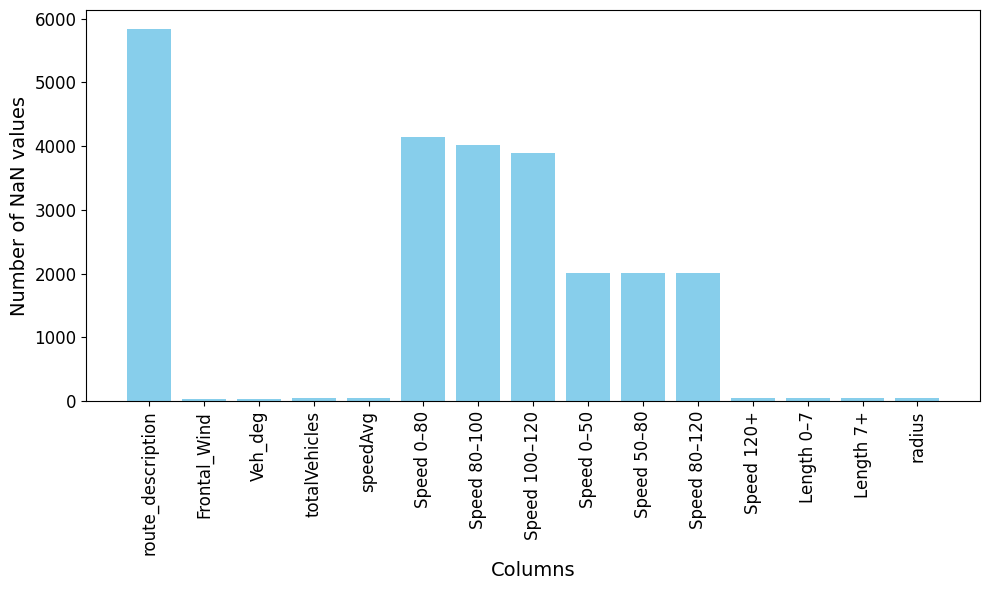

In [71]:
import os
import matplotlib.pyplot as plt
import pickle

# --- Create target directory ---
unnamed_folder = os.path.join("images", "unamed_png")
os.makedirs(unnamed_folder, exist_ok=True)

# --- Compute NaN counts, excluding columns with 0 NaN values ---
nan_count = df.isna().sum()
nan_count = nan_count[nan_count > 0]

# --- Custom shorter names for specific long column names ---
rename_map = {
    "cars_by_speed_interval_0_80": "Speed 0–80",
    "cars_by_speed_interval_80_100": "Speed 80–100",
    "cars_by_speed_interval_100_120": "Speed 100–120",
    "cars_by_speed_interval_0_50": "Speed 0–50",
    "cars_by_speed_interval_50_80": "Speed 50–80",
    "cars_by_speed_interval_80_120": "Speed 80–120",
    "cars_by_speed_interval_120_inf": "Speed 120+",
    "cars_by_length_interval_0_7": "Length 0–7",
    "cars_by_length_interval_7_inf": "Length 7+"
}

# --- Apply rename map to column labels ---
nan_count_renamed = nan_count.rename(index=lambda x: rename_map.get(x, x))

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(nan_count_renamed.index, nan_count_renamed.values, color='skyblue')
ax.set_xlabel("Columns", fontsize=14)
ax.set_ylabel("Number of NaN values", fontsize=14)
ax.tick_params(axis='x', labelrotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()

# --- Save the figure ---
fig_path_fig = os.path.join(unnamed_folder, "nan_values_filtered.fig")
with open(fig_path_fig, "wb") as f:
    pickle.dump(fig, f)

fig_path_svg = os.path.join(unnamed_folder, "nan_values_filtered.svg")
fig.savefig(fig_path_svg, format="svg")

print(f"✅ Figure saved at: {fig_path_fig}")
print(f"✅ SVG saved at: {fig_path_svg}")


In [72]:
print("Columns with NaN values:")
for col, count in nan_count.items():
    print(f"{col}: {count}")

Columns with NaN values:
route_description: 5843
Frontal_Wind: 29
Veh_deg: 29
totalVehicles: 54
speedAvg: 54
cars_by_speed_interval_0_80: 4142
cars_by_speed_interval_80_100: 4015
cars_by_speed_interval_100_120: 3892
cars_by_speed_interval_0_50: 2005
cars_by_speed_interval_50_80: 2005
cars_by_speed_interval_80_120: 2005
cars_by_speed_interval_120_inf: 54
cars_by_length_interval_0_7: 54
cars_by_length_interval_7_inf: 54
radius: 54


In [73]:
#drop unessary cols

cols_to_drop = [
    'cars_by_speed_interval_0_80',
    'cars_by_speed_interval_80_100',
    'cars_by_speed_interval_100_120',
    'cars_by_speed_interval_0_50',
    'cars_by_speed_interval_50_80',
    'cars_by_speed_interval_80_120',
    'cars_by_speed_interval_120_inf',
    'cars_by_length_interval_0_7',
    'cars_by_length_interval_7_inf',
    
]


df.drop(columns=cols_to_drop, inplace=True)

df.to_csv("combined_nissan_leaf_updated.csv", index=False)

print("Specified columns dropped successfully!")


Specified columns dropped successfully!


In [74]:
#drop unessary cols

cols_to_drop = [
    'route_description'
]


df.drop(columns=cols_to_drop, inplace=True)


print("Specified columns dropped successfully!")


Specified columns dropped successfully!


In [75]:
df.head()

timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  ...  wind_mph  wind_kph  \
0          1520              2          90  ...       2.2       3.6   
1          6200              2          89  ...       2.2       3.6   
2          9480              2          89  ...       2.2       3.6   
3          1960              2          89  ...       6.9      11.2   
4             0              2          88  ...       6.9      11.2   

   wind_degree  wind_dir  Frontal_Wind     Veh_deg totalVehicles  speedAvg  \
0            7         N     -0.471608  165.472486         389.0     115.0   
1            7         N     -3.372018   62.499915         389.0     115.0   
2            7         N     -3.376305  103.304374         389.0     115.0   
3          330       NNW     -2.874722 -164.872658         389.0     115.0   
4          330       NNW     -2.789435 -164.421701         389.0     115.0   

   max_speed radius  
0         30    3.0  
1         30    3.0  
2         55    3.0  
3         25    3.0  
4         90    3.0  

[5 rows x 39 columns]

In [76]:
# Assuming you've already loaded your DataFrame
import pandas as pd

# List of columns to drop
cols_to_drop = [
    "wind_mph",
    "wind_kph",
    "wind_degree",
    "wind_dir",
    "Veh_deg",
    "totalVehicles",
    "speedAvg",
    "max_speed",
    "radius",
    "timestamp_weather_utc",
    "car_description",
    "car_code",
    "route_description",
    "point_geom",
    "latitude",
    "longitude",
    "route_id",
    "timestamp_gps_utc",
    "time_diff",
    "car_id"
]

# Drop the specified columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Verify that the columns have been dropped
print("Remaining columns in the DataFrame:")
print(df.columns)


Remaining columns in the DataFrame:
Index(['timestamp_data_utc', 'elv_spy', 'speed', 'soc', 'amb_temp', 'soh',
       'regenwh', 'Motor Pwr(w)', 'Aux Pwr(100w)', 'Motor Temp', 'Torque Nm',
       'rpm', 'altitude', 'route_code', 'driver', 'start_timestamp',
       'end_timestamp', 'capacity', 'ref_consumption', 'Frontal_Wind'],
      dtype='object')


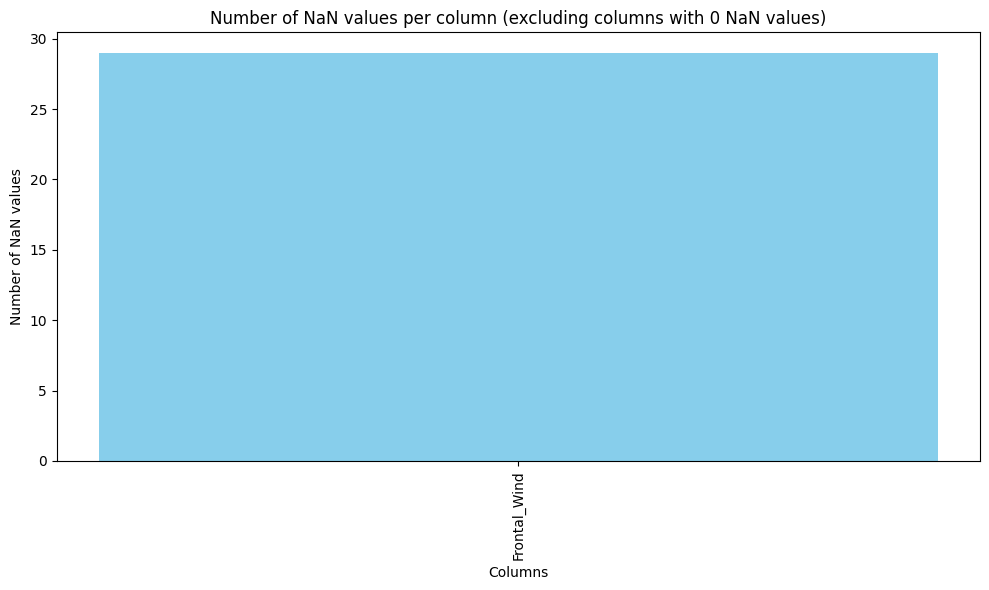

In [77]:
nan_count = df.isna().sum()

nan_count = nan_count[nan_count > 0]


plt.figure(figsize=(10, 6))
plt.bar(nan_count.index, nan_count.values, color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Number of NaN values per column (excluding columns with 0 NaN values)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd

group_keys = ['soc', 'route_code', 'driver']

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col] = df.groupby(group_keys)[col].transform(lambda x: x.fillna(x.mean()))

print(df[numeric_cols].isna().sum())


elv_spy            0
speed              0
soc                0
amb_temp           0
soh                0
regenwh            0
Motor Pwr(w)       0
Aux Pwr(100w)      0
Motor Temp         0
Torque Nm          0
rpm                0
altitude           0
capacity           0
ref_consumption    0
Frontal_Wind       0
dtype: int64


In [79]:
df.head()

timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  Torque Nm   rpm   altitude  \
0          1520              2          90      -0.22  1346  100.05206   
1          6200              2          89      -0.81  2146  100.17676   
2          9480              2          89       2.66  1936  102.89105   
3          1960              2          89      -0.61  2144  103.12073   
4             0              2          88      -2.33   665  103.60736   

                             route_code driver start_timestamp end_timestamp  \
0  20230418_NISSAN_ANDOAIN_AZPEITIA_015     d1         33:01.3       13:56.6   
1  20230418_NISSAN_ANDOAIN_AZPEITIA_015     d1         33:01.3       13:56.6   
2  20230418_NISSAN_ANDOAIN_AZPEITIA_015     d1         33:01.3       13:56.6   
3  20230418_NISSAN_ANDOAIN_AZPEITIA_015     d1         33:01.3       13:56.6   
4  20230418_NISSAN_ANDOAIN_AZPEITIA_015     d1         33:01.3       13:56.6   

   capacity  ref_consumption  Frontal_Wind  
0     62000              174     -0.471608  
1     62000              174     -3.372018  
2     62000              174     -3.376305  
3     62000              174     -2.874722  
4     62000              174     -2.789435

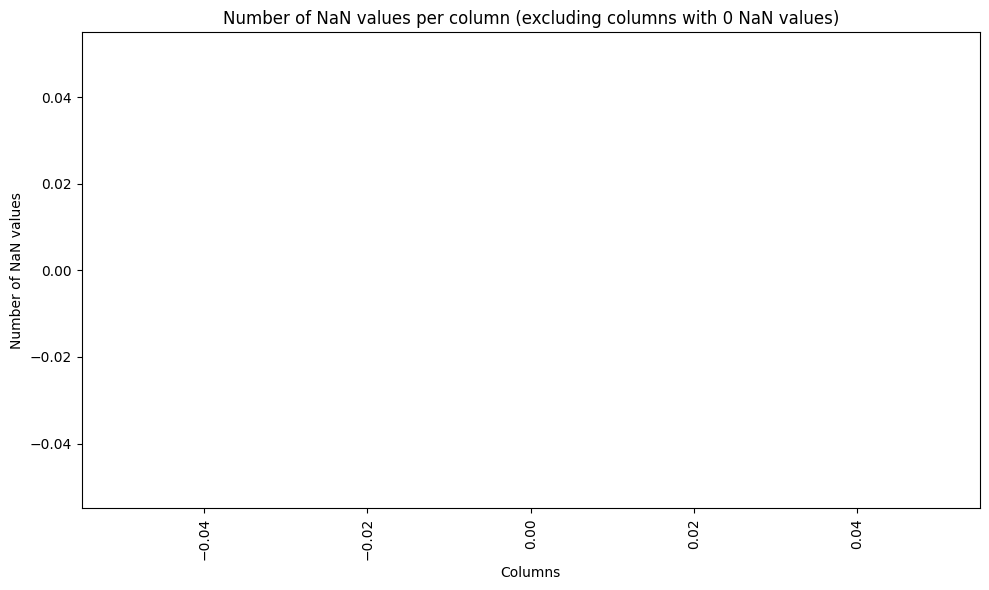

In [80]:
nan_count = df.isna().sum()

nan_count = nan_count[nan_count > 0]


plt.figure(figsize=(10, 6))
plt.bar(nan_count.index, nan_count.values, color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Number of NaN values per column (excluding columns with 0 NaN values)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [81]:
for col in df.columns:
    print(col)


timestamp_data_utc
elv_spy
speed
soc
amb_temp
soh
regenwh
Motor Pwr(w)
Aux Pwr(100w)
Motor Temp
Torque Nm
rpm
altitude
route_code
driver
start_timestamp
end_timestamp
capacity
ref_consumption
Frontal_Wind


In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating a copy of df to preserve the original
lstm_df = df.copy()

# 1. Drop start_timestamp and end_timestamp
lstm_df.drop(columns=['start_timestamp', 'end_timestamp'], inplace=True)

# 2. One-Hot Encode (OHE) the driver column
lstm_df = pd.get_dummies(lstm_df, columns=['driver'], prefix='driver')

# 3. Process route_code (Label Encoding)
le = LabelEncoder()
lstm_df['route_code'] = le.fit_transform(lstm_df['route_code'].astype(str))  # Convert to string before encoding

# 4. Create the new range feature
lstm_df['speed_mps'] = lstm_df['speed'] * (5/18)  # Convert km/h to m/s
lstm_df['range'] = lstm_df['speed_mps'] / (60/7)  # Apply the given formula

# Drop intermediate speed_mps if not needed
lstm_df.drop(columns=['speed_mps'], inplace=True)




In [83]:
lstm_df.head()

timestamp_data_utc  elv_spy  speed  soc  amb_temp    soh  regenwh  \
0   18/04/2023 11:33       98   12.7   87      17.5  99.27     -617   
1   18/04/2023 11:33       98   32.1   87      17.5  99.27     -617   
2   18/04/2023 11:33       98   30.7   87      17.5  99.27     -617   
3   18/04/2023 11:33       98   34.4   87      17.5  99.27     -617   
4   18/04/2023 11:33       98   20.9   87      17.5  99.27     -626   

   Motor Pwr(w)  Aux Pwr(100w)  Motor Temp  ...   altitude  route_code  \
0          1520              2          90  ...  100.05206           0   
1          6200              2          89  ...  100.17676           0   
2          9480              2          89  ...  102.89105           0   
3          1960              2          89  ...  103.12073           0   
4             0              2          88  ...  103.60736           0   

   capacity  ref_consumption  Frontal_Wind  driver_d1  driver_d2  driver_d3  \
0     62000              174     -0.471608       True      False      False   
1     62000              174     -3.372018       True      False      False   
2     62000              174     -3.376305       True      False      False   
3     62000              174     -2.874722       True      False      False   
4     62000              174     -2.789435       True      False      False   

   driver_d4     range  
0      False  0.411574  
1      False  1.040278  
2      False  0.994907  
3      False  1.114815  
4      False  0.677315  

[5 rows x 22 columns]

In [84]:
# Cell 1: Data Cleaning and Initial Preprocessing
import pandas as pd

# Load data
df = pd.read_csv("combined_nissan_leaf.csv")

# Drop unnecessary columns
cols_to_drop = [
    'cars_by_speed_interval_0_80', 'cars_by_speed_interval_80_100',
    'cars_by_speed_interval_100_120', 'cars_by_speed_interval_0_50',
    'cars_by_speed_interval_50_80', 'cars_by_speed_interval_80_120',
    'cars_by_speed_interval_120_inf', 'cars_by_length_interval_0_7',
    'cars_by_length_interval_7_inf', 'route_description', 'wind_mph',
    'wind_kph', 'wind_degree', 'wind_dir', 'Veh_deg', 'totalVehicles',
    'speedAvg', 'max_speed', 'radius', 'timestamp_weather_utc',
    'car_description', 'car_code', 'point_geom', 'latitude', 'longitude',
    'route_id', 'timestamp_gps_utc', 'time_diff', 'car_id'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("Remaining columns:", df.columns.tolist())

# Cell 2: Handling Missing Values
numeric_cols = df.select_dtypes(include=['number']).columns
group_keys = ['soc', 'route_code', 'driver']

for col in numeric_cols:
    df[col] = df.groupby(group_keys)[col].transform(lambda x: x.fillna(x.mean()))

print(df[numeric_cols].isna().sum())

# Cell 3: Encoding Categorical Features and Feature Engineering
from sklearn.preprocessing import LabelEncoder

lstm_df = df.copy()

# Drop timestamps
lstm_df.drop(columns=['start_timestamp', 'end_timestamp'], inplace=True, errors='ignore')

# One-hot encode driver
lstm_df = pd.get_dummies(lstm_df, columns=['driver'], prefix='driver')

# Label encode route_code
le = LabelEncoder()
lstm_df['route_code'] = le.fit_transform(lstm_df['route_code'].astype(str))

# Create range feature and drop intermediate
lstm_df['speed_mps'] = lstm_df['speed'] * (5/18)
lstm_df['range'] = lstm_df['speed_mps'] / (60/7)
lstm_df.drop(columns=['speed_mps'], inplace=True)

# Cell 4: Save Cleaned Data
lstm_df.to_csv("combined_nissan_leaf_cleaned.csv", index=False)
print("Data preprocessing complete. Cleaned data saved.")


Remaining columns: ['timestamp_data_utc', 'elv_spy', 'speed', 'soc', 'amb_temp', 'soh', 'regenwh', 'Motor Pwr(w)', 'Aux Pwr(100w)', 'Motor Temp', 'Torque Nm', 'rpm', 'altitude', 'route_code', 'driver', 'start_timestamp', 'end_timestamp', 'capacity', 'ref_consumption', 'Frontal_Wind']
elv_spy            0
speed              0
soc                0
amb_temp           0
soh                0
regenwh            0
Motor Pwr(w)       0
Aux Pwr(100w)      0
Motor Temp         0
Torque Nm          0
rpm                0
altitude           0
capacity           0
ref_consumption    0
Frontal_Wind       0
dtype: int64
Data preprocessing complete. Cleaned data saved.


## DO NOT RUN IT WILL TAKE TIME

In [ ]:
######################################################################## IMPORTANt ADHARSH LOOK HERE !!!!!!!#######################################
##################################################################################################################################################
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from sklearn.model_selection import ParameterGrid

# Ensure timestamp is in datetime format
lstm_df['timestamp_data_utc'] = pd.to_datetime(lstm_df['timestamp_data_utc'])

# Sort data by route_code and timestamp_data_utc
lstm_df.sort_values(by=['route_code', 'timestamp_data_utc'], inplace=True)

# Define feature and target columns
feature_cols = [col for col in lstm_df.columns if col not in ['timestamp_data_utc', 'range']]
target_col = 'range'

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
lstm_df_scaled = lstm_df.copy()
lstm_df_scaled[feature_cols] = scaler_X.fit_transform(lstm_df_scaled[feature_cols])
lstm_df_scaled[target_col] = scaler_y.fit_transform(lstm_df_scaled[[target_col]])

# Function to create sequences
def create_sequences_by_route(df, seq_length, feature_cols, target_col):
    X_list, y_list = [], []
    for route, group in df.groupby('route_code'):
        group = group.sort_values('timestamp_data_utc')
        features = group[feature_cols].values
        target = group[target_col].values
        if len(features) > seq_length:
            for i in range(len(features) - seq_length):
                X_list.append(features[i:i+seq_length])
                y_list.append(target[i+seq_length])
    return np.array(X_list), np.array(y_list)

seq_length = 10
X, y = create_sequences_by_route(lstm_df_scaled, seq_length, feature_cols, target_col)

# Updated wider parameter grid with fixed epochs and four activation functions
param_grid = {
    'num_layers': [1, 2, 3],
    'units': [50, 100, 150],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'epochs': [500],  # Fixed at 500 epochs for all runs
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid', 'elu'],
    'recurrent_dropout': [0.0, 0.2, 0.3]
}

# Function to create LSTM model
def create_lstm_model(num_layers, units, dropout_rate, learning_rate, optimizer, activation, recurrent_dropout):
    model = Sequential()
    for i in range(num_layers):
        return_sequences = True if i < num_layers - 1 else False
        # Provide input_shape only for the first LSTM layer
        if i == 0:
            model.add(LSTM(units, activation=activation, recurrent_dropout=recurrent_dropout,
                           return_sequences=return_sequences, input_shape=(X.shape[1], X.shape[2])))
        else:
            model.add(LSTM(units, activation=activation, recurrent_dropout=recurrent_dropout,
                           return_sequences=return_sequences))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    opt = Adam(learning_rate) if optimizer == 'adam' else RMSprop(learning_rate)
    model.compile(optimizer=opt, loss='mse')
    return model

# Grid Search
best_score = float("inf")
best_params = None

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    # Filter out parameters that are not needed for model creation
    model_params = {k: v for k, v in params.items() if k not in ['batch_size', 'epochs']}
    model = create_lstm_model(**model_params)
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, min_delta=1e-4)
    
    history = model.fit(
        X, y,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_split=0.2,
        verbose=0,
        callbacks=[TqdmCallback(verbose=1), early_stopping]
    )
    val_loss = min(history.history['val_loss'])
    if val_loss < best_score:
        best_score = val_loss
        best_params = params

print("Best Parameters:", best_params)


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert timestamp
lstm_df['timestamp_data_utc'] = pd.to_datetime(lstm_df['timestamp_data_utc'])
lstm_df.sort_values(by=['route_code', 'timestamp_data_utc'], inplace=True)

# Features and target
feature_cols = [col for col in lstm_df.columns if col not in ['timestamp_data_utc', 'range']]
target_col = 'range'

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
lstm_df_scaled = lstm_df.copy()
lstm_df_scaled[feature_cols] = scaler_X.fit_transform(lstm_df_scaled[feature_cols])
lstm_df_scaled[target_col] = scaler_y.fit_transform(lstm_df_scaled[[target_col]])

# Create sequences
def create_sequences_by_route(df, seq_length, feature_cols, target_col):
    X_list, y_list = [], []
    for route, group in df.groupby('route_code'):
        group = group.sort_values('timestamp_data_utc')
        features = group[feature_cols].values
        target = group[target_col].values
        if len(features) > seq_length:
            for i in range(len(features) - seq_length):
                X_list.append(features[i:i+seq_length])
                y_list.append(target[i+seq_length])
    return np.array(X_list), np.array(y_list)

seq_length = 10
X, y = create_sequences_by_route(lstm_df_scaled, seq_length, feature_cols, target_col)

X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, recurrent_dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=recurrent_dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])
        out = self.fc(out)
        return out

# Model config
input_size = X.shape[2]
hidden_size = 100
num_layers = 2
dropout = 0.3
recurrent_dropout = 0.2
batch_size = 64
epochs = 2000
learning_rate = 0.001

model = LSTMModel(input_size, hidden_size, num_layers, dropout, recurrent_dropout).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with tqdm
for epoch in tqdm(range(epochs), desc="Training Progress"):
    model.train()
    permutation = torch.randperm(X_tensor.size(0))
    
    for i in range(0, X_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_tensor[indices], y_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

print("✅ Training complete.")


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# ================= Data Preparation =================

# Assume lstm_df is already loaded
# Convert timestamp to datetime and sort by route and timestamp
lstm_df['timestamp_data_utc'] = pd.to_datetime(lstm_df['timestamp_data_utc'])
lstm_df.sort_values(by=['route_code', 'timestamp_data_utc'], inplace=True)

# Define feature and target columns
feature_cols = [col for col in lstm_df.columns if col not in ['timestamp_data_utc', 'range']]
target_col = 'range'

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
lstm_df_scaled = lstm_df.copy()
lstm_df_scaled[feature_cols] = scaler_X.fit_transform(lstm_df_scaled[feature_cols])
lstm_df_scaled[target_col] = scaler_y.fit_transform(lstm_df_scaled[[target_col]])

# Function to create sequences for each route
def create_sequences_by_route(df, seq_length, feature_cols, target_col):
    X_list, y_list = [], []
    for route, group in df.groupby('route_code'):
        group = group.sort_values('timestamp_data_utc')
        features = group[feature_cols].values
        target = group[target_col].values
        if len(features) > seq_length:
            for i in range(len(features) - seq_length):
                X_list.append(features[i:i+seq_length])
                y_list.append(target[i+seq_length])
    return np.array(X_list), np.array(y_list)

seq_length = 10
X, y = create_sequences_by_route(lstm_df_scaled, seq_length, feature_cols, target_col)

# Split data into training and validation sets (80/20 split)
split_idx = int(0.8 * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Convert to PyTorch tensors and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_val_tensor   = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor   = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

# ================= Model Definition =================

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, recurrent_dropout, activation):
        super(LSTMModel, self).__init__()
        # The dropout parameter here applies between LSTM layers in multi-layer setups.
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=recurrent_dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)
        # Choose activation based on string input
        if activation == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation == 'relu':
            self.activation = torch.relu
        elif activation == 'tanh':
            self.activation = torch.tanh
        elif activation == 'elu':
            self.activation = nn.functional.elu
        else:
            self.activation = lambda x: x  # Identity if no valid activation provided

    def forward(self, x):
        # x shape: [batch_size, seq_length, input_size]
        lstm_out, _ = self.lstm(x)
        # Use the output of the last time step
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        out = self.activation(out)
        return out

# ================= Hyperparameter Setup =================

# Best fixed parameters from your earlier tuning (except epochs)
params = {
    'activation': 'sigmoid',
    'batch_size': 64,
    'dropout_rate': 0.2,
    'learning_rate': 0.001,
    'num_layers': 2,
    'optimizer': 'adam',  # We'll use Adam in this example
    'recurrent_dropout': 0.3,
    'units': 100
}

# Candidate epoch values to test
candidate_epochs = [100, 200, 300, 400, 500, 600, 800, 1000]
results = {}  # To store final validation loss for each candidate

# ================= Hyperparameter Tuning: Number of Epochs =================

print("\nTuning the ideal number of epochs...\n")
for candidate in candidate_epochs:
    print(f"Training for {candidate} epochs...")
    # Initialize a fresh model for each candidate
    model = LSTMModel(
        input_size=X_train.shape[2],
        hidden_size=params['units'],
        num_layers=params['num_layers'],
        dropout=params['dropout_rate'],
        recurrent_dropout=params['recurrent_dropout'],
        activation=params['activation']
    ).to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    batch_size = params['batch_size']
    
    # Training loop for current candidate epoch count
    for epoch in tqdm(range(candidate), desc=f"Candidate {candidate} epochs", leave=False):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        epoch_loss = 0.0
        num_batches = 0
        for i in range(0, X_train_tensor.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x = X_train_tensor[indices]
            batch_y = y_train_tensor[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            num_batches += 1
        # Optionally, you could print the average loss per epoch here
        # avg_loss = epoch_loss / num_batches
    
    # Evaluate on validation set after training candidate epochs
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
    
    results[candidate] = val_loss
    print(f"--> Candidate Epochs: {candidate} | Final Validation Loss: {val_loss:.6f}\n")

# ================= Summary =================

print("Validation Loss for Candidate Epochs:")
for candidate, loss in results.items():
    print(f"Epochs: {candidate:4d} -> Val Loss: {loss:.6f}")

best_candidate = min(results, key=results.get)
print(f"\nBest number of epochs: {best_candidate} with Val Loss: {results[best_candidate]:.6f}")


## base lstm training 
will taketime to run

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm

# ================= Data Preparation =================

# Convert timestamp to datetime and sort by route and timestamp
lstm_df['timestamp_data_utc'] = pd.to_datetime(lstm_df['timestamp_data_utc'])
lstm_df.sort_values(by=['route_code', 'timestamp_data_utc'], inplace=True)

# Define feature and target columns
feature_cols = [col for col in lstm_df.columns if col not in ['timestamp_data_utc', 'range']]
target_col = 'range'

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
lstm_df_scaled = lstm_df.copy()
lstm_df_scaled[feature_cols] = scaler_X.fit_transform(lstm_df_scaled[feature_cols])
lstm_df_scaled[target_col] = scaler_y.fit_transform(lstm_df_scaled[[target_col]])

# Function to create sequences for each route
def create_sequences_by_route(df, seq_length, feature_cols, target_col):
    X_list, y_list = [], []
    for route, group in df.groupby('route_code'):
        group = group.sort_values('timestamp_data_utc')
        features = group[feature_cols].values
        target = group[target_col].values
        if len(features) > seq_length:
            for i in range(len(features) - seq_length):
                X_list.append(features[i:i+seq_length])
                y_list.append(target[i+seq_length])
    return np.array(X_list), np.array(y_list)

seq_length = 10
X, y = create_sequences_by_route(lstm_df_scaled, seq_length, feature_cols, target_col)

# Split data into training and testing sets (80/20 split)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Convert to PyTorch tensors and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# ================= Model Definition =================

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, recurrent_dropout, activation):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=recurrent_dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)
        if activation == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation == 'relu':
            self.activation = torch.relu
        elif activation == 'tanh':
            self.activation = torch.tanh
        elif activation == 'elu':
            self.activation = nn.functional.elu
        else:
            self.activation = lambda x: x

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        out = self.activation(out)
        return out

# ================= Train with Best Epoch =================

params = {
    'activation': 'sigmoid',
    'batch_size': 64,
    'dropout_rate': 0.2,
    'learning_rate': 0.001,
    'num_layers': 2,
    'optimizer': 'adam',
    'recurrent_dropout': 0.3,
    'units': 100
}

best_epochs = 500

model = LSTMModel(
    input_size=X_train.shape[2],
    hidden_size=params['units'],
    num_layers=params['num_layers'],
    dropout=params['dropout_rate'],
    recurrent_dropout=params['recurrent_dropout'],
    activation=params['activation']
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

# Training
model.train()
for epoch in tqdm(range(best_epochs), desc="Training", leave=True):
    permutation = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), params['batch_size']):
        indices = permutation[i:i+params['batch_size']]
        batch_x = X_train_tensor[indices]
        batch_y = y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# ================= Evaluation =================

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()
    true_values = y_test_tensor.cpu().numpy()

    # Inverse transform to original scale
    predictions = scaler_y.inverse_transform(predictions)
    true_values = scaler_y.inverse_transform(true_values)

    mse = mean_squared_error(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)

print("\n================ Evaluation Metrics ================")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


## Final Model Building (LSTM + GBT) , code is in the file final model